In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split,GridSearchCV
import statsmodels
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import classification_report,cohen_kappa_score,confusion_matrix,roc_curve,roc_auc_score,accuracy_score,f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier


In [2]:
plt.rcParams['figure.figsize']=[15,8]

In [3]:
df=pd.read_csv(r"C:\Users\14253\Desktop\Credit_Card.csv")

In [4]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
df.shape

(30000, 25)

In [6]:
df.rename?

Signature:
df.rename(
    mapper: 'Renamer | None' = None,
    *,
    index: 'Renamer | None' = None,
    columns: 'Renamer | None' = None,
    axis: 'Axis | None' = None,
    copy: 'bool | None' = None,
    inplace: 'bool' = False,
    level: 'Level' = None,
    errors: 'IgnoreRaise' = 'ignore',
) -> 'DataFrame | None'
Docstring:
Rename columns or index labels.

Function / dict values must be unique (1-to-1). Labels not contained in
a dict / Series will be left as-is. Extra labels listed don't throw an
error.

See the :ref:`user guide <basics.rename>` for more.

Parameters
----------
mapper : dict-like or function
    Dict-like or function transformations to apply to
    that axis' values. Use either ``mapper`` and ``axis`` to
    specify the axis to target with ``mapper``, or ``index`` and
    ``columns``.
index : dict-like or function
    Alternative to specifying axis (``mapper, axis=0``
    is equivalent to ``index=mapper``).
columns : dict-like or function
    Alternative to spec

In [7]:
df.rename(columns={'PAY_0':'PAY_1'},inplace = True)

In [8]:
# Sex, Education, Marriage, Pay_1, Pay_2, Pay_3,Pay_4, Pay_5 are categorical columns, so, we will change their datatype
# Our target variable is also categorical (as this is a classification problem),so,we will change it to object as well

df['SEX'] = df['SEX'].astype(object)
df['EDUCATION'] = df['EDUCATION'].astype(object)
df['EDUCATION'] = df['MARRIAGE'].astype(object)
df['PAY_1'] = df['PAY_1'].astype(object)
df['PAY_2'] = df['PAY_2'].astype(object)
df['PAY_3'] = df['PAY_3'].astype(object)
df['PAY_4'] = df['PAY_4'].astype(object)
df['PAY_5'] = df['PAY_5'].astype(object)
df['PAY_6'] = df['PAY_6'].astype(object)
df['default.payment.next.month'] = df['default.payment.next.month'].astype(object)

In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  object 
 3   EDUCATION                   30000 non-null  object 
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_1                       30000 non-null  object 
 7   PAY_2                       30000 non-null  object 
 8   PAY_3                       30000 non-null  object 
 9   PAY_4                       30000 non-null  object 
 10  PAY_5                       30000 non-null  object 
 11  PAY_6                       30000 non-null  object 
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [10]:
df.describe()

,ID,LIMIT_BAL,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.551867,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,8660.398374,129747.661567,0.521970,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,1.000000,10000.000000,0.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,15000.500000,140000.000000,2.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,22500.250000,240000.000000,2.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,30000.000000,1000000.000000,3.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


In [11]:
#1. The above suggests the presence of outliers in all the columns except age
#2. The columns BILL_AMT1-BILL_AMT6 contain negative values, indicating that some customers have overpaid their previous bills. 


In [12]:
df.describe(include=object)

,SEX,EDUCATION,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,2,4,11,11,11,11,10,10,2
top,2,2,0,0,0,0,0,0,0
freq,18112,15964,14737,15730,15764,16455,16947,16286,23364


In [13]:
cat_cols = df.select_dtypes(include=object)

In [14]:

for i in cat_cols:
    print(df[i].value_counts())

SEX
2    18112
1    11888
Name: count, dtype: int64
EDUCATION
2    15964
1    13659
3      323
0       54
Name: count, dtype: int64
PAY_1
0     14737
-1     5686
1      3688
-2     2759
2      2667
3       322
4        76
5        26
8        19
6        11
7         9
Name: count, dtype: int64
PAY_2
0     15730
-1     6050
2      3927
-2     3782
3       326
4        99
1        28
5        25
7        20
6        12
8         1
Name: count, dtype: int64
PAY_3
0     15764
-1     5938
-2     4085
2      3819
3       240
4        76
7        27
6        23
5        21
1         4
8         3
Name: count, dtype: int64
PAY_4
0     16455
-1     5687
-2     4348
2      3159
3       180
4        69
7        58
5        35
6         5
1         2
8         2
Name: count, dtype: int64
PAY_5
0     16947
-1     5539
-2     4546
2      2626
3       178
4        84
7        58
5        17
6         4
8         1
Name: count, dtype: int64
PAY_6
0     16286
-1     5740
-2     4895
2      2766
3     

In [15]:

df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_1                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [16]:
df_duplicate = df[df.duplicated(keep='last')]
df_duplicate

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month


In [17]:
df = df.drop(columns = 'ID',axis=1)
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,1,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,1,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,1,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [18]:
df.select_dtypes(np.number)

,LIMIT_BAL,MARRIAGE,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000.0,1,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0
1,120000.0,2,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0
2,90000.0,2,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0
3,50000.0,1,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0
4,50000.0,1,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,39,188948.0,192815.0,208365.0,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0
29996,150000.0,2,43,1683.0,1828.0,3502.0,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0
29997,30000.0,2,37,3565.0,3356.0,2758.0,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0
29998,80000.0,1,41,-1645.0,78379.0,76304.0,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0


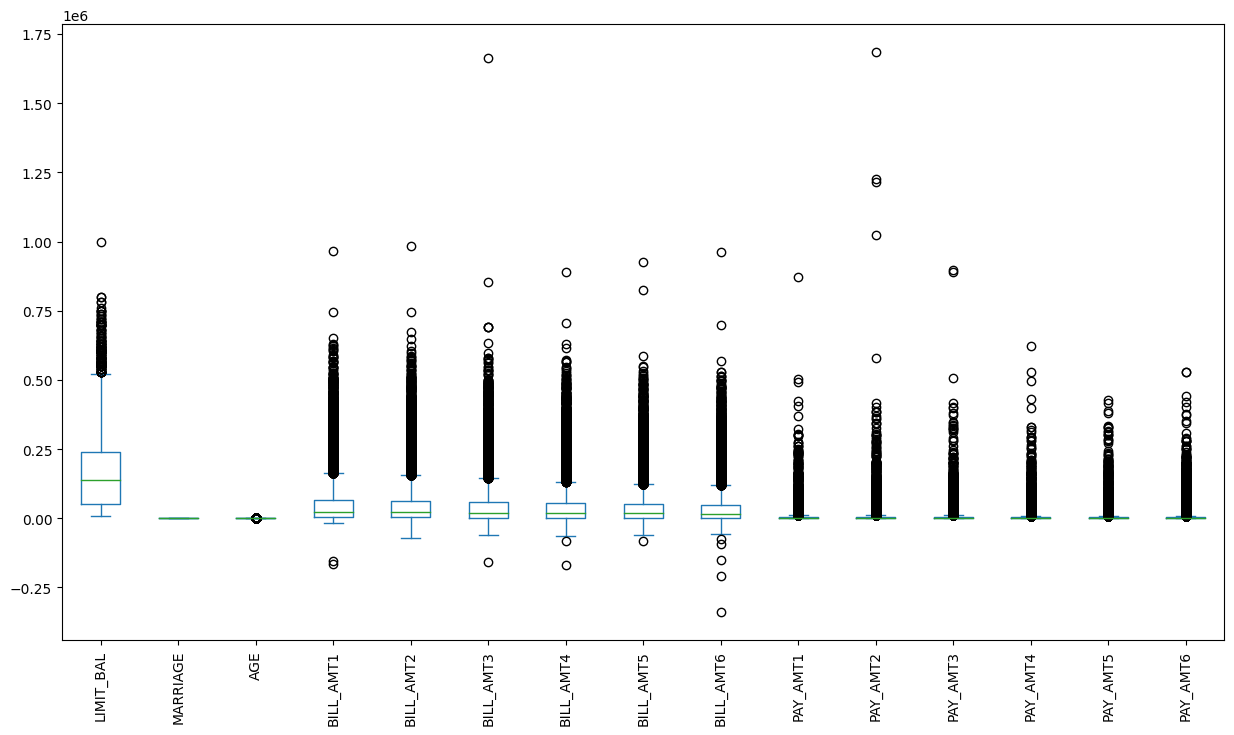

In [19]:
df.select_dtypes(np.number).plot(kind='box')
plt.xticks(rotation=90)
plt.show()

In [20]:
q1 = df['LIMIT_BAL'].quantile(0.25)
q3 = df["LIMIT_BAL"].quantile(0.75)
iqr = q3-q1
ul = q3+1.5*iqr
ll = q1-1.5*iqr
df['LIMIT_BAL'][(df['LIMIT_BAL'] > ul)].sort_values(ascending = False)

df['LIMIT_BAL'][(df['LIMIT_BAL'] < ll)].sort_values(ascending = False)

df['LIMIT_BAL'][~((df['LIMIT_BAL']>ul)|(df['LIMIT_BAL']<ll))].sort_values(ascending = False)


20018    520000.0
25332    520000.0
5295     520000.0
4703     520000.0
23445    520000.0
           ...   
11486     10000.0
17812     10000.0
13876     10000.0
4653      10000.0
10167     10000.0
Name: LIMIT_BAL, Length: 29833, dtype: float64

In [21]:
q1 = df['BILL_AMT1'].quantile(0.25)
q3 = df["BILL_AMT1"].quantile(0.75)
iqr = q3-q1
ul = q3+1.5*iqr
ll = q1-1.5*iqr
df['BILL_AMT1'][(df['BILL_AMT1'] > ul)].sort_values(ascending = False)

df['BILL_AMT1'][(df['BILL_AMT1'] < ll)].sort_values(ascending = False)

df['BILL_AMT1'][~((df['BILL_AMT1']>ul)|(df['BILL_AMT1']<ll))].sort_values(ascending = False)

# Range of normal values: -15308 - 162296
# Range of outliers: 162439 - 964511
# Range of inliers: -165580 - -154973


16424    162296.0
8035     162241.0
14448    162118.0
22933    162110.0
1046     162105.0
           ...   
4635      -9802.0
27465    -10682.0
29779    -11545.0
351      -14386.0
8835     -15308.0
Name: BILL_AMT1, Length: 27600, dtype: float64

In [22]:
q1 = df['BILL_AMT2'].quantile(0.25)
q3 = df["BILL_AMT2"].quantile(0.75)
iqr = q3-q1
ul = q3+1.5*iqr
ll = q1-1.5*iqr
df['BILL_AMT2'][(df['BILL_AMT2'] > ul)].sort_values(ascending = False)

df['BILL_AMT2'][(df['BILL_AMT2'] < ll)].sort_values(ascending = False)

df['BILL_AMT2'][~((df['BILL_AMT2']>ul)|(df['BILL_AMT2']<ll))].sort_values(ascending = False)

# Range of normal values: -69777 - 155508
# Range of outliers: 155635 - 983931
# No inliers

22871    155508.0
3887     155438.0
9175     155421.0
15058    155392.0
4296     155371.0
           ...   
19366    -26214.0
4439     -30000.0
8835     -33350.0
25862    -67526.0
21729    -69777.0
Name: BILL_AMT2, Length: 27605, dtype: float64

In [23]:
q1 = df['BILL_AMT3'].quantile(0.25)
q3 = df["BILL_AMT3"].quantile(0.75)
iqr = q3-q1
ul = q3+1.5*iqr
ll = q1-1.5*iqr
df['BILL_AMT3'][(df['BILL_AMT3'] > ul)].sort_values(ascending = False)

df[df['BILL_AMT3']==1664089.0]


df['BILL_AMT3'][(df['BILL_AMT3'] < ll)].sort_values(ascending = False)

df['BILL_AMT3'][~((df['BILL_AMT3']>ul)|(df['BILL_AMT3']<ll))].sort_values(ascending = False)

# Range of normal values: -61506 - 146410
# Range of outliers: 146464 - 1664089
# Range of inliers: - 157264


6380     146410.0
8488     146396.0
6225     146277.0
24724    146245.0
22511    146193.0
           ...   
27271    -24702.0
21235    -25443.0
8347     -34041.0
29491    -46127.0
18876    -61506.0
Name: BILL_AMT3, Length: 27531, dtype: float64

In [24]:
q1 = df['BILL_AMT4'].quantile(0.25)
q3 = df["BILL_AMT4"].quantile(0.75)
iqr = q3-q1
ul = q3+1.5*iqr
ll = q1-1.5*iqr
df['BILL_AMT4'][(df['BILL_AMT4'] > ul)].sort_values(ascending = False)

df['BILL_AMT4'][(df['BILL_AMT4'] < ll)].sort_values(ascending = False)

df['BILL_AMT4'][~((df['BILL_AMT4']>ul)|(df['BILL_AMT4']<ll))].sort_values(ascending = False)


6159     132754.0
17074    132731.0
27439    132703.0
22320    132683.0
20602    132677.0
           ...   
27327    -27490.0
8347     -34503.0
21235    -46627.0
29491    -50616.0
24856    -65167.0
Name: BILL_AMT4, Length: 27378, dtype: float64

In [25]:
q1 = df['BILL_AMT5'].quantile(0.25)
q3 = df["BILL_AMT5"].quantile(0.75)
iqr = q3-q1
ul = q3+1.5*iqr
ll = q1-1.5*iqr
df['BILL_AMT5'][(df['BILL_AMT5'] > ul)].sort_values(ascending = False)

df['BILL_AMT5'][(df['BILL_AMT5'] < ll)].sort_values(ascending = False)

df['BILL_AMT5'][~((df['BILL_AMT5']>ul)|(df['BILL_AMT5']<ll))].sort_values(ascending = False)


26282    122830.0
14448    122755.0
27079    122740.0
4221     122664.0
1326     122657.0
           ...   
17970    -36156.0
14548    -37594.0
21235    -46627.0
29491    -53007.0
26670    -61372.0
Name: BILL_AMT5, Length: 27275, dtype: float64

In [26]:
q1 = df['BILL_AMT6'].quantile(0.25)
q3 = df["BILL_AMT6"].quantile(0.75)
iqr = q3-q1
ul = q3+1.5*iqr
ll = q1-1.5*iqr
df['BILL_AMT6'][(df['BILL_AMT6'] > ul)].sort_values(ascending = False)

df['BILL_AMT6'][(df['BILL_AMT6'] < ll)].sort_values(ascending = False)

df['BILL_AMT6'][~((df['BILL_AMT6']>ul)|(df['BILL_AMT6']<ll))].sort_values(ascending = False)


6931     121062.0
13112    121028.0
17136    121027.0
10297    120940.0
1706     120937.0
           ...   
5548     -45734.0
21235    -46627.0
3525     -51183.0
12388    -51443.0
27080    -57060.0
Name: BILL_AMT6, Length: 27307, dtype: float64

In [27]:
q1 = df['PAY_AMT1'].quantile(0.25)
q3 = df["PAY_AMT1"].quantile(0.75)
iqr = q3-q1
ul = q3+1.5*iqr
ll = q1-1.5*iqr
df['PAY_AMT1'][(df['PAY_AMT1'] > ul)].sort_values(ascending = False)

df['PAY_AMT1'][(df['PAY_AMT1'] < ll)].sort_values(ascending = False)

df['PAY_AMT1'][~((df['PAY_AMT1']>ul)|(df['PAY_AMT1']<ll))].sort_values(ascending = False)

q1 = df['PAY_AMT1'].quantile(0.25)
q3 = df["PAY_AMT1"].quantile(0.75)
iqr = q3-q1
ul = q3+3*iqr
ll = q1-3*iqr
df['PAY_AMT1'][(df['PAY_AMT1'] > ul)].sort_values(ascending = False)

df['PAY_AMT1'][(df['PAY_AMT1'] > ul)].sort_values(ascending = False).quantile(0.95)

# Range of normal values: 0 - 11013
# Range of outliers: 11016 - 873552
# No inliers

# Inference: When we take q3+3*iqr as the upper limit, the lower value for the outliers does not show a very significant shift from that when q3+1.5*iqr is the upper limit
# It indicates there might be some extreme values, so we can give a suitable cutoff for deciding outliers
# As we can see from above that 95% of the values of the columns are below 150000. So, we can take this as our cutoff for outliers.

q1 = df['PAY_AMT2'].quantile(0.25)
q3 = df["PAY_AMT2"].quantile(0.75)
iqr = q3-q1
ul = q3+1.5*iqr
ll = q1-1.5*iqr
df['PAY_AMT2'][(df['PAY_AMT2'] > ul)].sort_values(ascending = False)

df['PAY_AMT2'][(df['PAY_AMT2'] < ll)].sort_values(ascending = False)

df['PAY_AMT2'][~((df['PAY_AMT2']>ul)|(df['PAY_AMT2']<ll))].sort_values(ascending = False)

q1 = df['PAY_AMT2'].quantile(0.25)
q3 = df["PAY_AMT2"].quantile(0.75)
iqr = q3-q1
ul = q3+3*iqr
ll = q1-3*iqr
df['PAY_AMT2'][(df['PAY_AMT2'] > ul)].sort_values(ascending = False)

df['PAY_AMT2'][(df['PAY_AMT2'] > ul)].sort_values(ascending = False).quantile(0.95)

# Range of normal values: 0 - 11249
# Range of outliers: 11253 - 1684259
# No inliers

# Inference: We see above that there are some extreme values on the upper whisker.
# We can draw similar inferences for this column as the previous pay column (95% values lie below 166050 - which is not far from the 0.95 quantile for the previous column (150000))
# Hence, same strategy can be used for all the pay columns.

q1 = df['PAY_AMT3'].quantile(0.25)
q3 = df["PAY_AMT3"].quantile(0.75)
iqr = q3-q1
ul = q3+1.5*iqr
ll = q1-1.5*iqr
df['PAY_AMT3'][(df['PAY_AMT3'] > ul)].sort_values(ascending = False)

df['PAY_AMT3'][(df['PAY_AMT3'] < ll)].sort_values(ascending = False)

df['PAY_AMT3'][~((df['PAY_AMT3']>ul)|(df['PAY_AMT3']<ll))].sort_values(ascending = False)

# Range of normal values: 0 - 10673
# Range of outliers: 10692- 896040
# No inliers

q1 = df['PAY_AMT4'].quantile(0.25)
q3 = df["PAY_AMT4"].quantile(0.75)
iqr = q3-q1
ul = q3+1.5*iqr
ll = q1-1.5*iqr
df['PAY_AMT4'][(df['PAY_AMT4'] > ul)].sort_values(ascending = False)

df['PAY_AMT4'][(df['PAY_AMT4'] < ll)].sort_values(ascending = False)

df['PAY_AMT4'][~((df['PAY_AMT4']>ul)|(df['PAY_AMT4']<ll))].sort_values(ascending = False)

# Range of normal values: 0 - 9584
# Range of outliers: 9590 - 621000
# No inliers

q1 = df['PAY_AMT5'].quantile(0.25)
q3 = df["PAY_AMT5"].quantile(0.75)
iqr = q3-q1
ul = q3+1.5*iqr
ll = q1-1.5*iqr
df['PAY_AMT5'][(df['PAY_AMT5'] > ul)].sort_values(ascending = False)

df['PAY_AMT5'][(df['PAY_AMT5'] < ll)].sort_values(ascending = False)

df['PAY_AMT5'][~((df['PAY_AMT5']>ul)|(df['PAY_AMT5']<ll))].sort_values(ascending = False)

# Range of normal values: 0 - 9700
# Range of outliers: 9701 - 426529
# No inliers

q1 = df['PAY_AMT6'].quantile(0.25)
q3 = df["PAY_AMT6"].quantile(0.75)
iqr = q3-q1
ul = q3+1.5*iqr
ll = q1-1.5*iqr
df['PAY_AMT6'][(df['PAY_AMT6'] > ul)].sort_values(ascending = False)

df['PAY_AMT6'][(df['PAY_AMT6'] < ll)].sort_values(ascending = False)

df['PAY_AMT6'][~((df['PAY_AMT6']>ul)|(df['PAY_AMT6']<ll))].sort_values(ascending = False)

# Range of normal values: 0 - 9817
# Range of outliers: 9832 - 528666
# No inliers

q1 = df['AGE'].quantile(0.25)
q3 = df["AGE"].quantile(0.75)
iqr = q3-q1
ul = q3+1.5*iqr
ll = q1-1.5*iqr
df['AGE'][(df['AGE'] > ul)].sort_values(ascending = False)

df['AGE'][(df['AGE'] < ll)].sort_values(ascending = False)

df['AGE'][~((df['AGE']>ul)|(df['AGE']<ll))].sort_values(ascending = False)

# Range of normal values: 21 - 60
# Range of outliers: 61 - 79
# No inliers

# The outlier values in age column are normal for a real life scenario, so we should not drop these outliers.


9791     60
25044    60
5545     60
20313    60
26516    60
         ..
13705    21
23905    21
12556    21
529      21
25182    21
Name: AGE, Length: 29728, dtype: int64

In [28]:
num_cols=df.select_dtypes(include=np.number).columns
num_cols

Index(['LIMIT_BAL', 'MARRIAGE', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

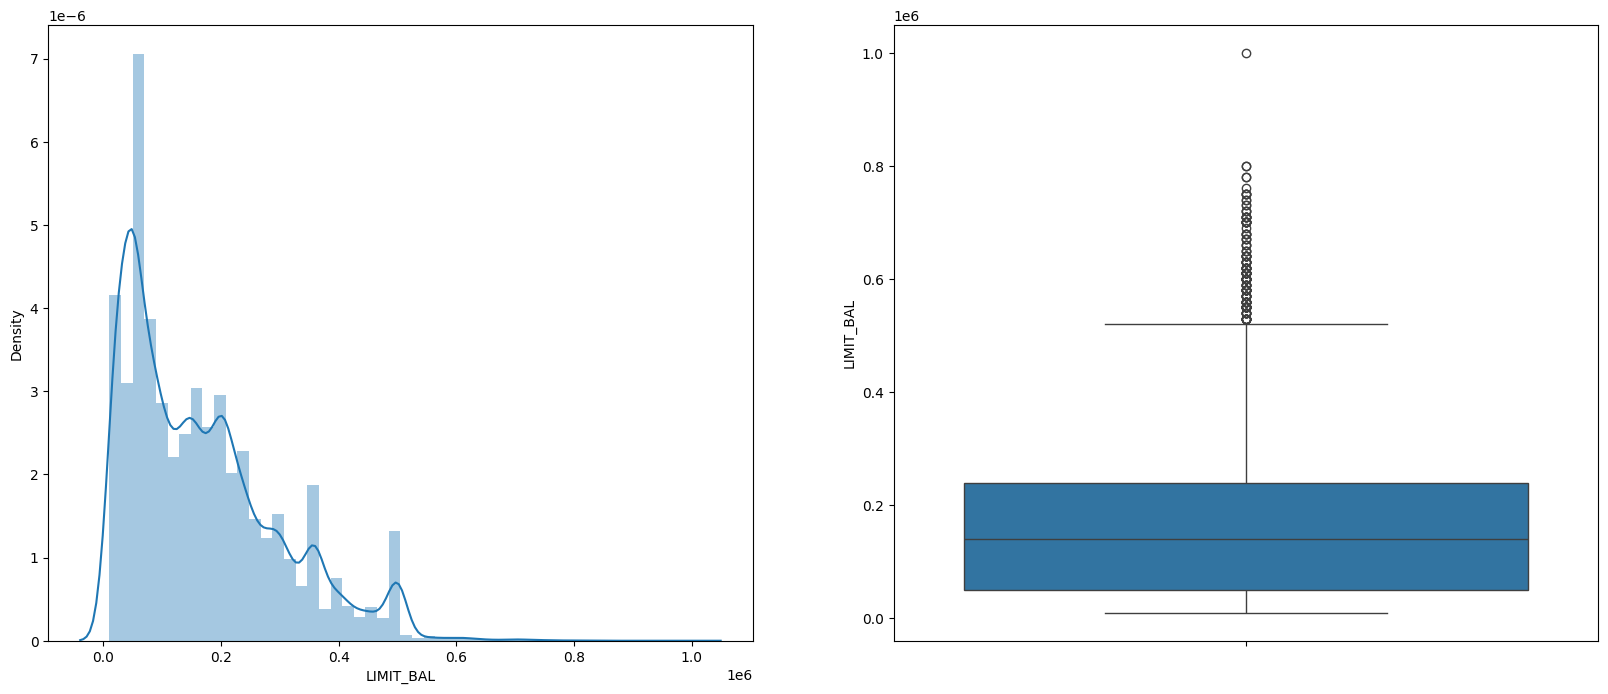

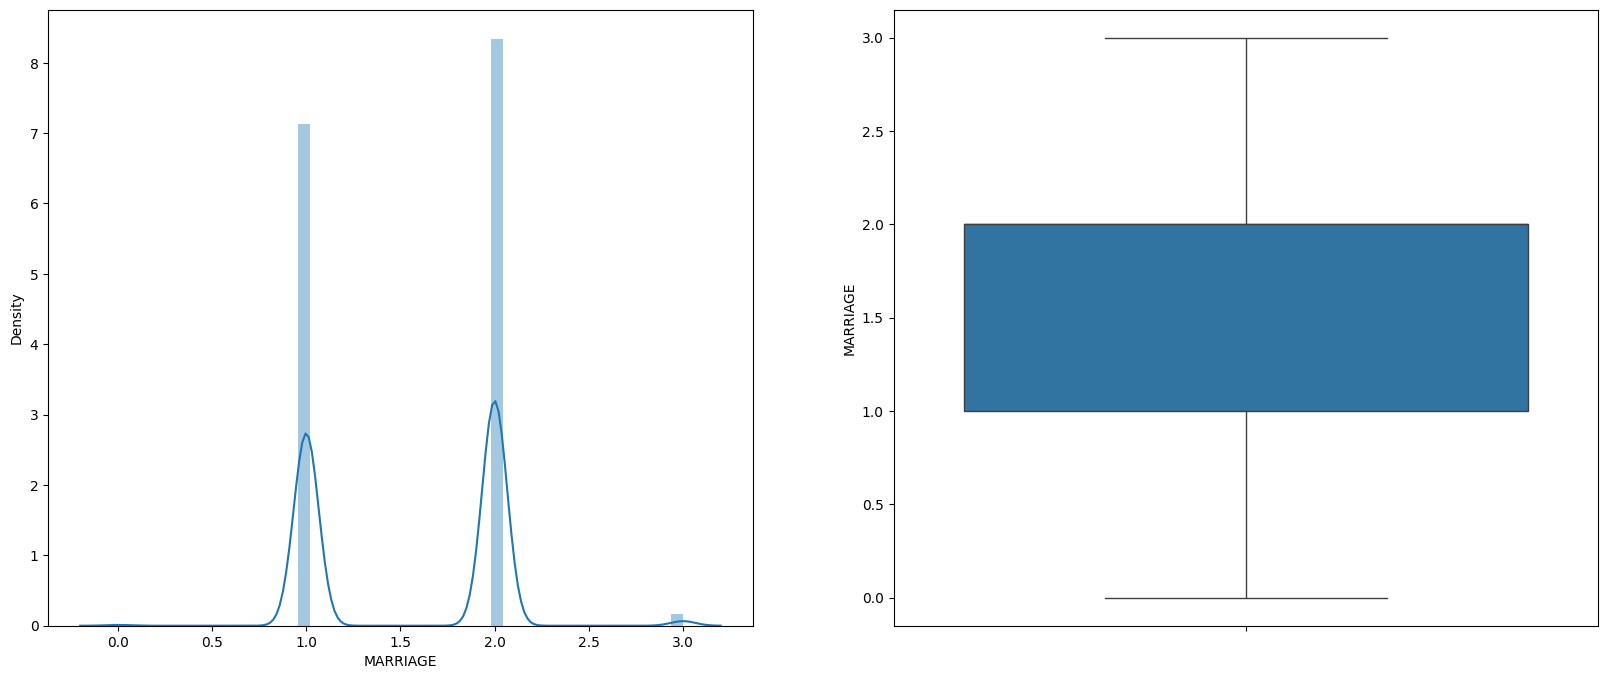

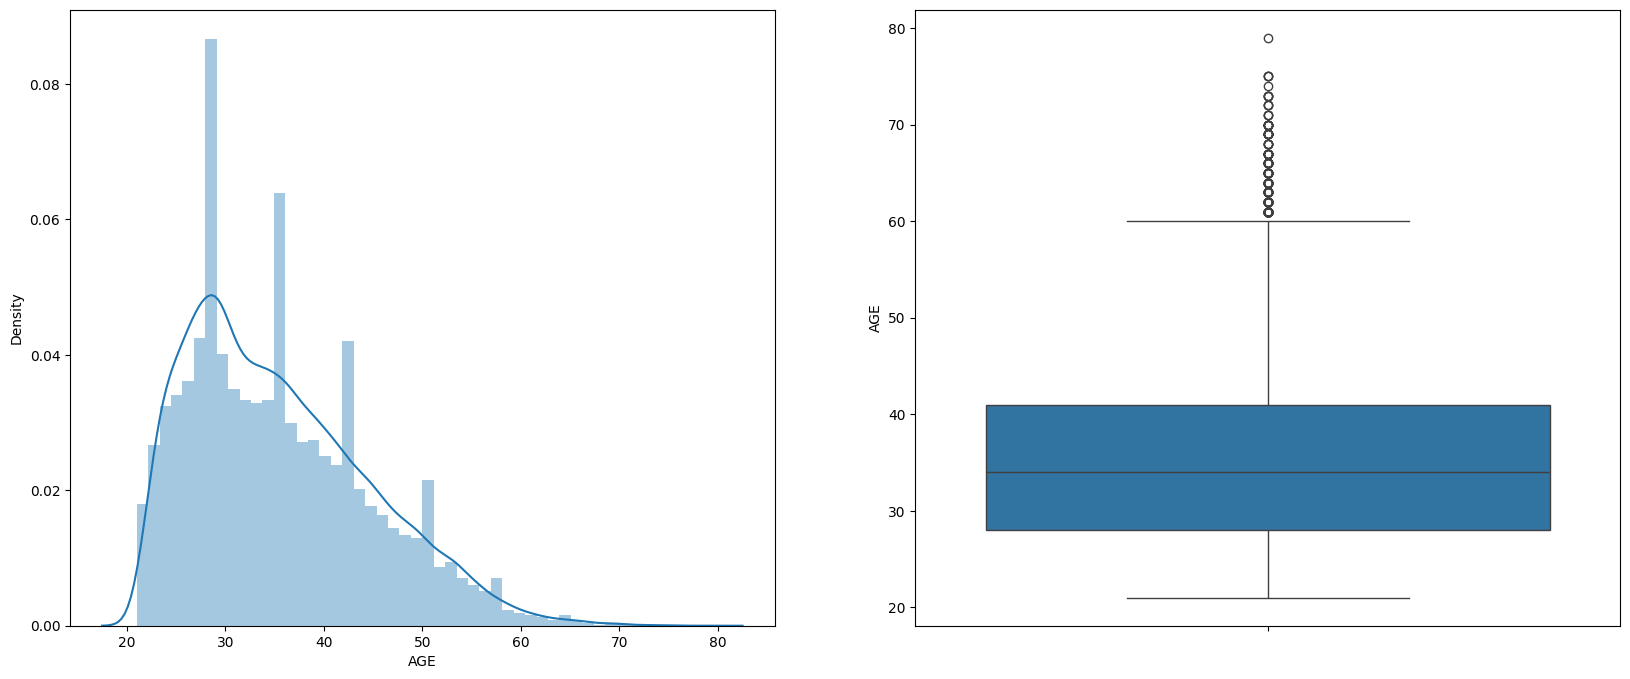

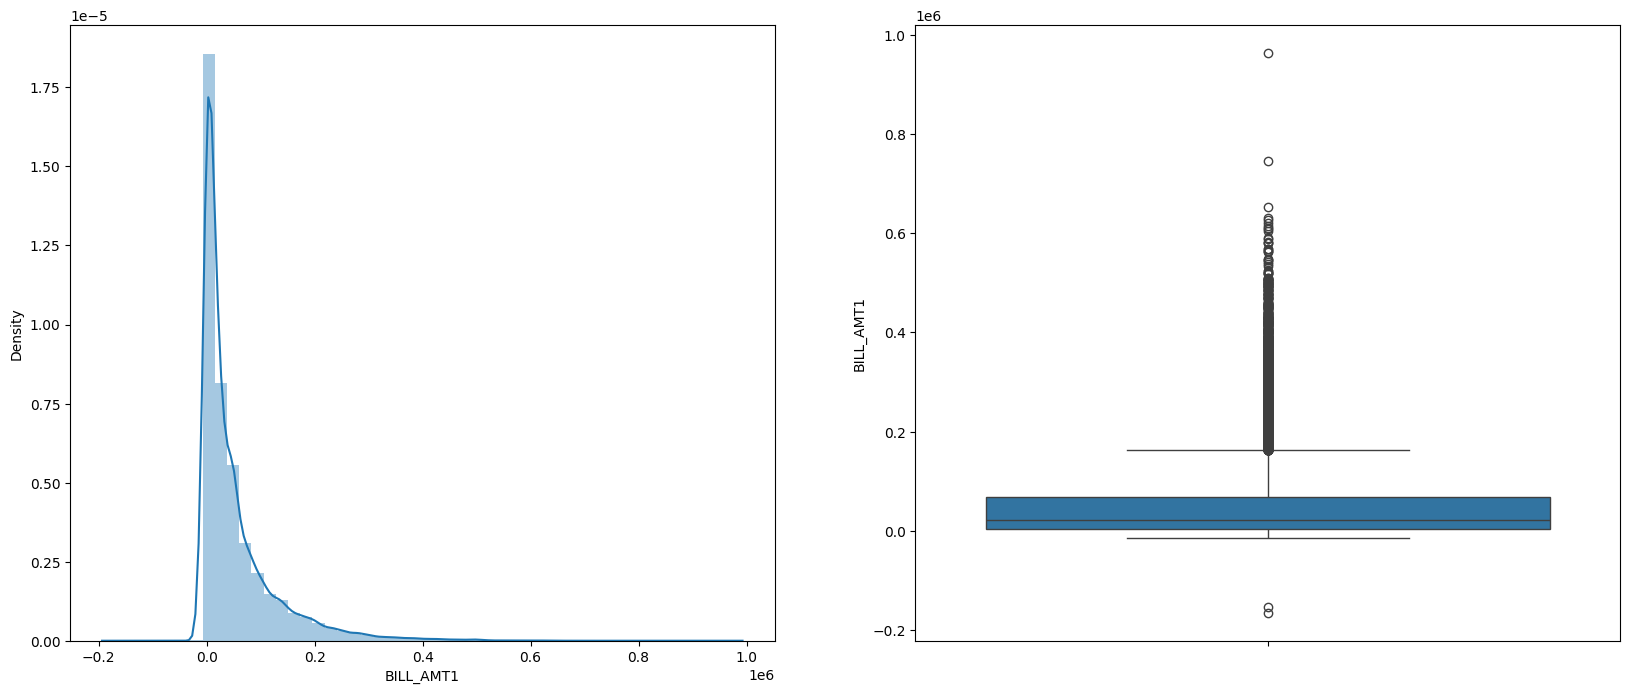

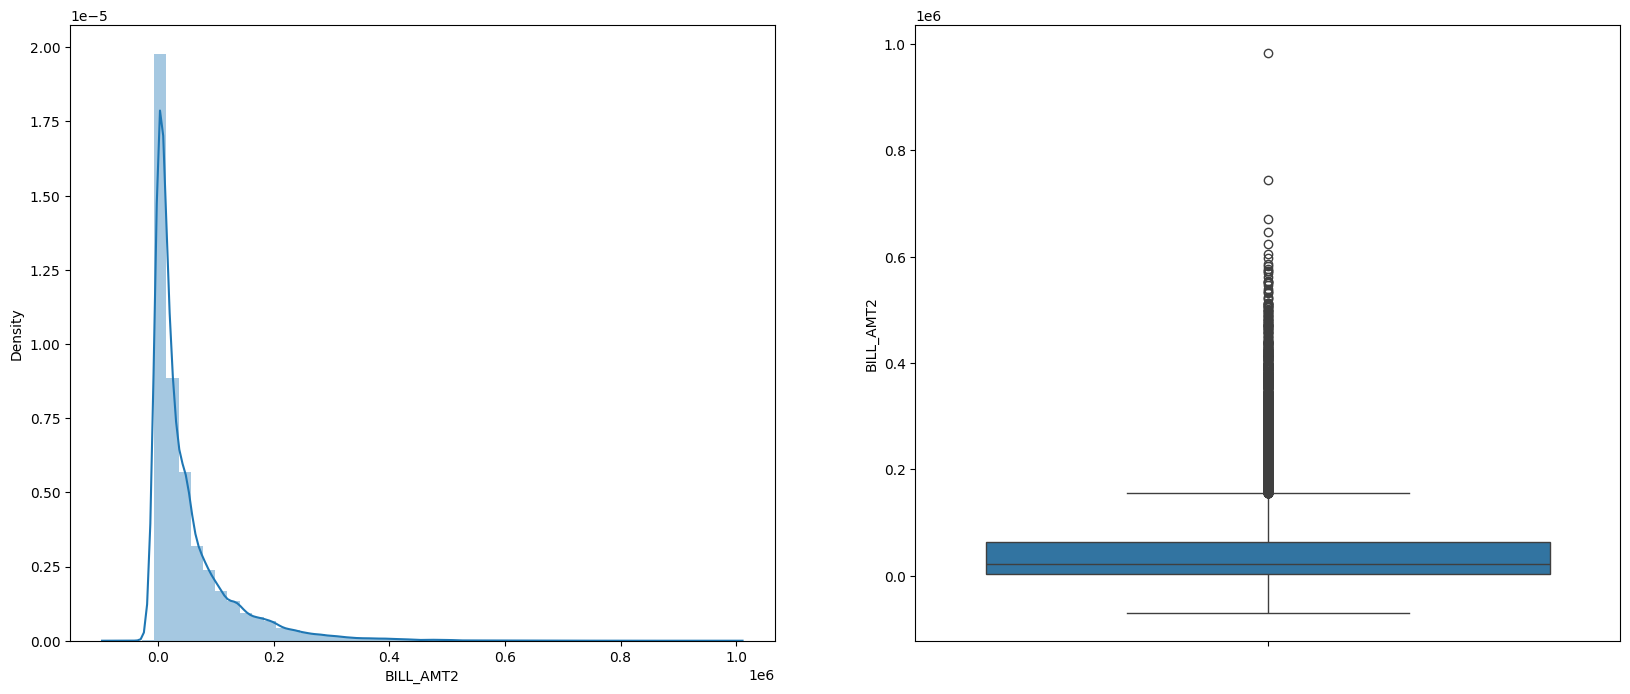

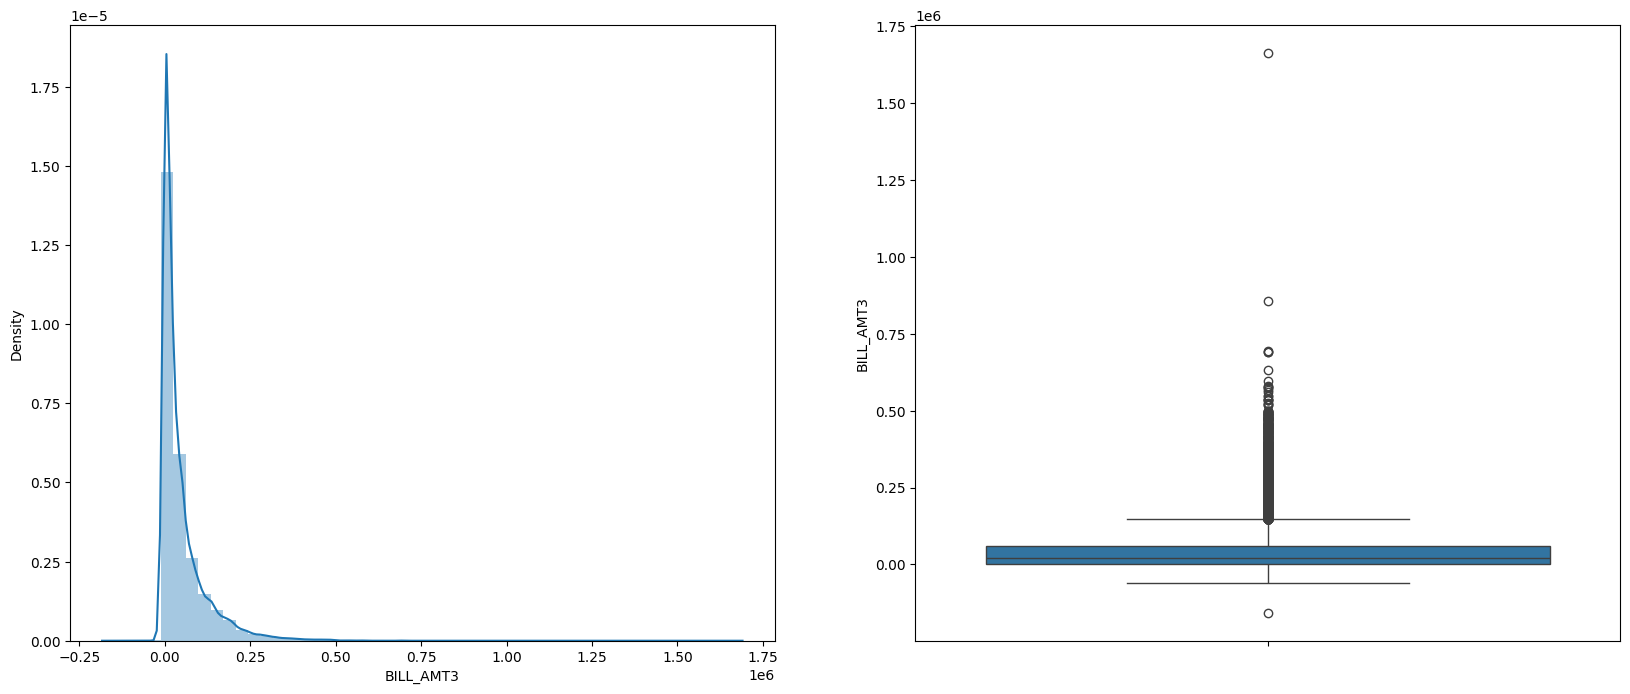

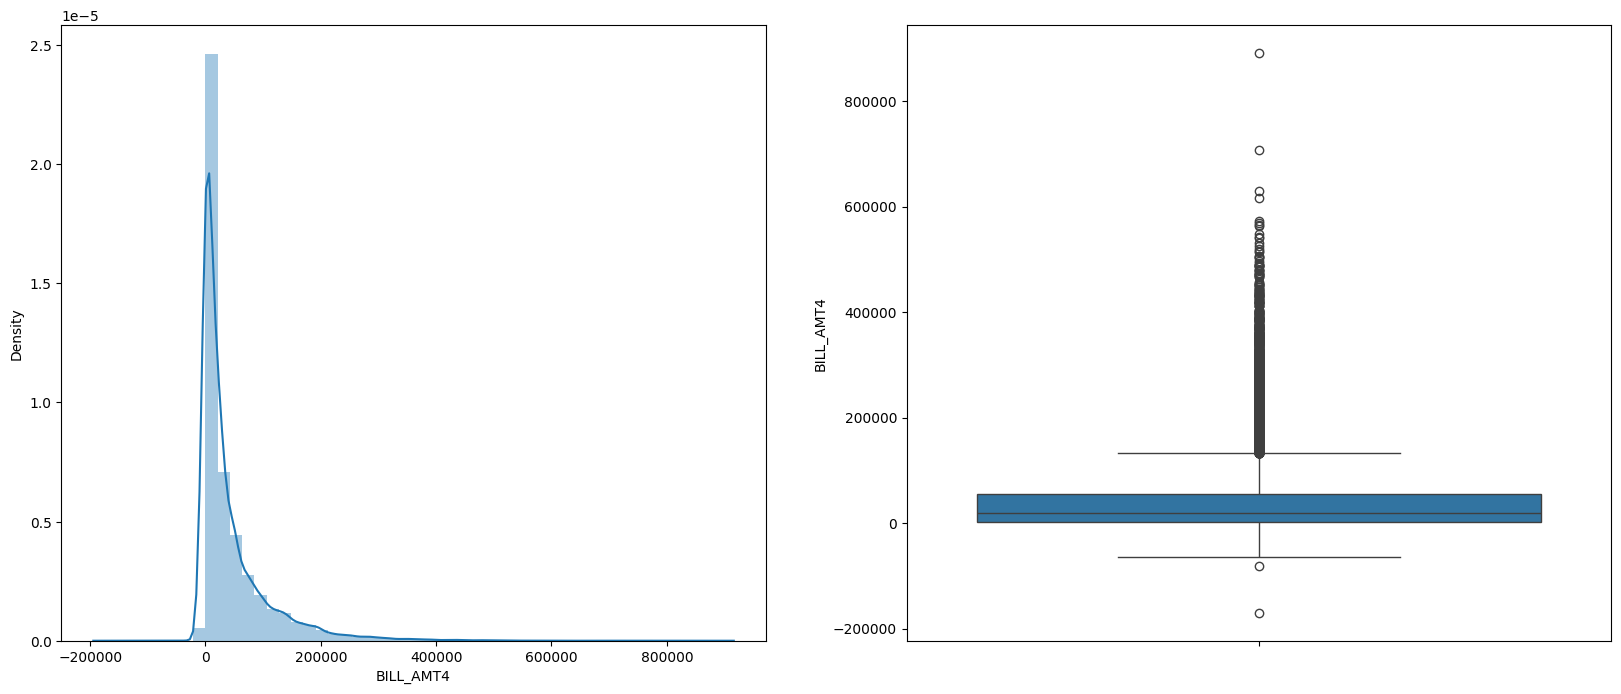

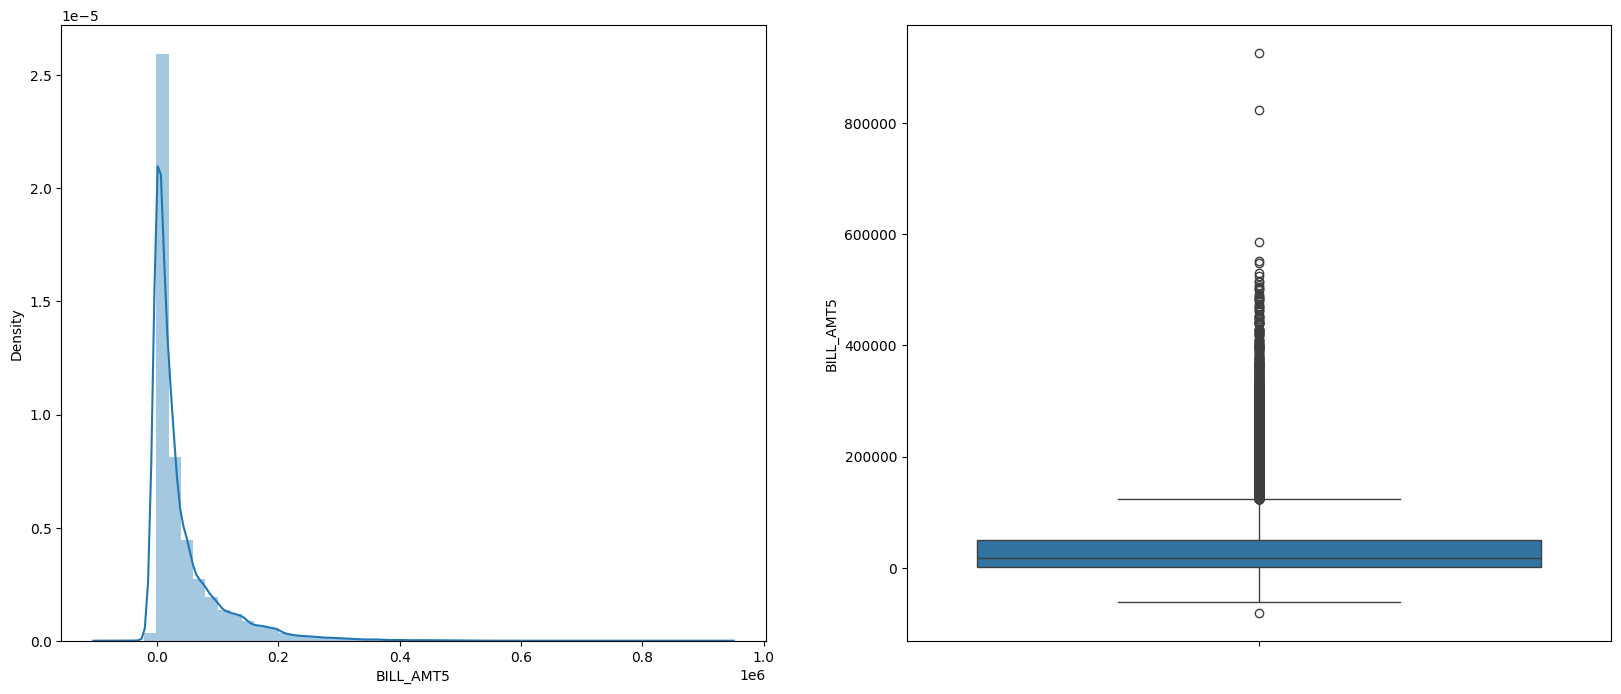

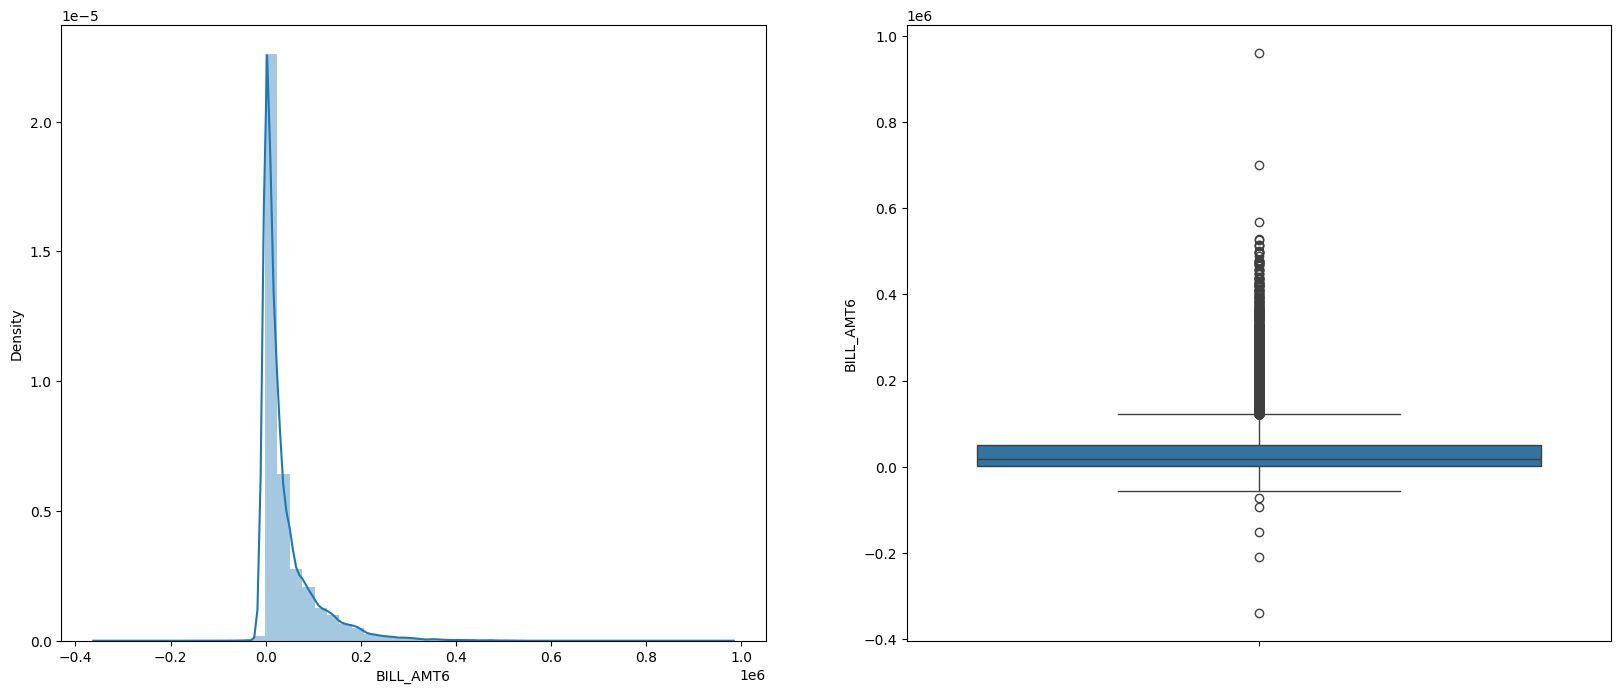

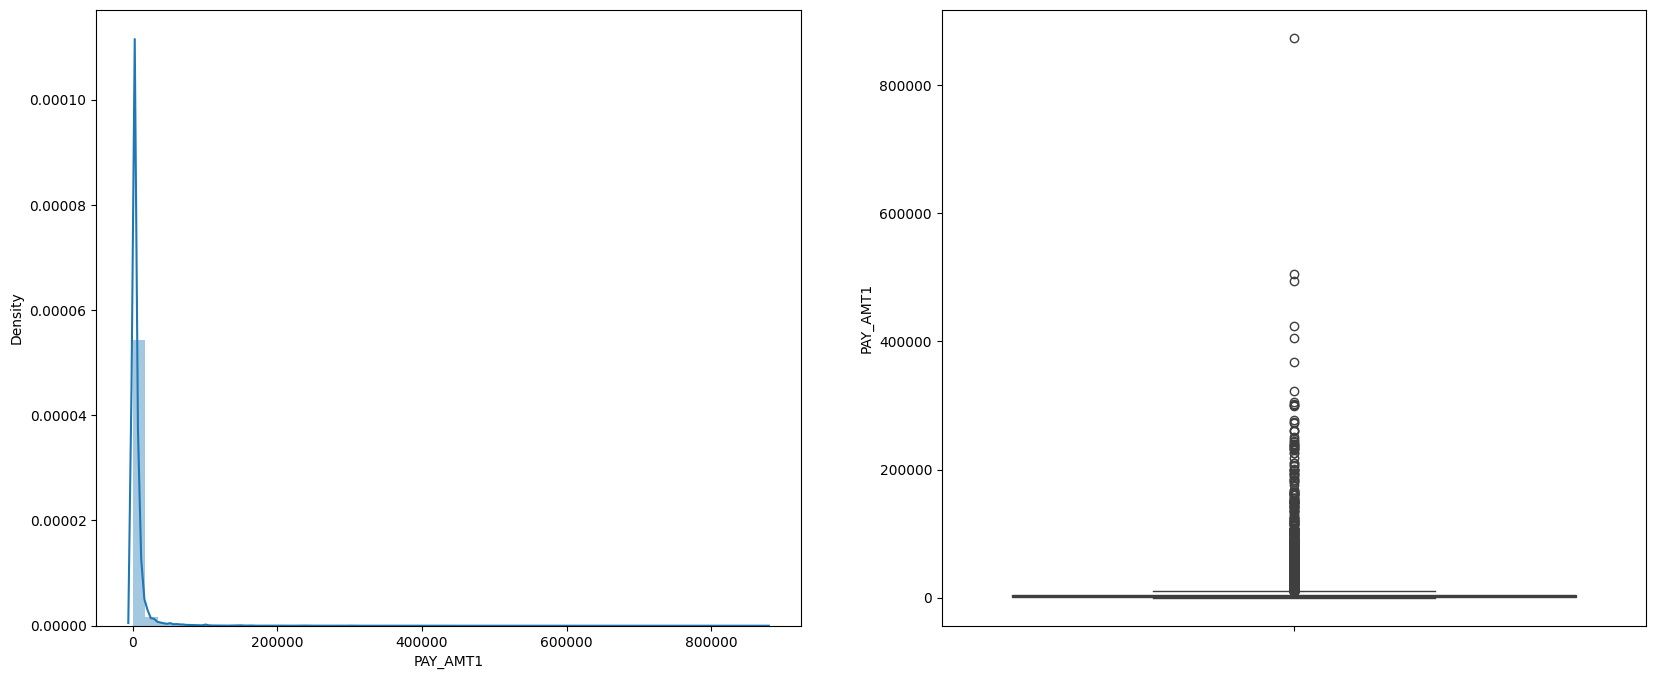

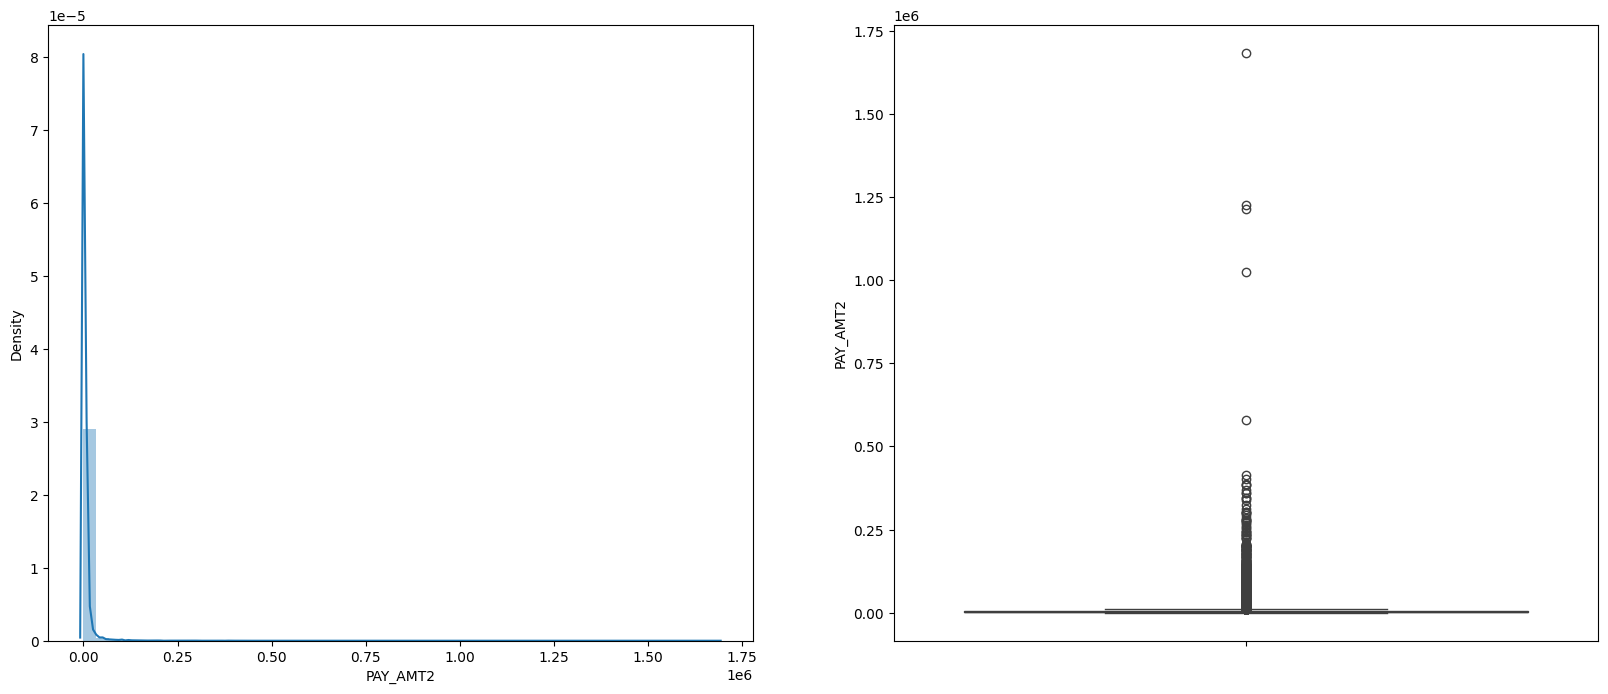

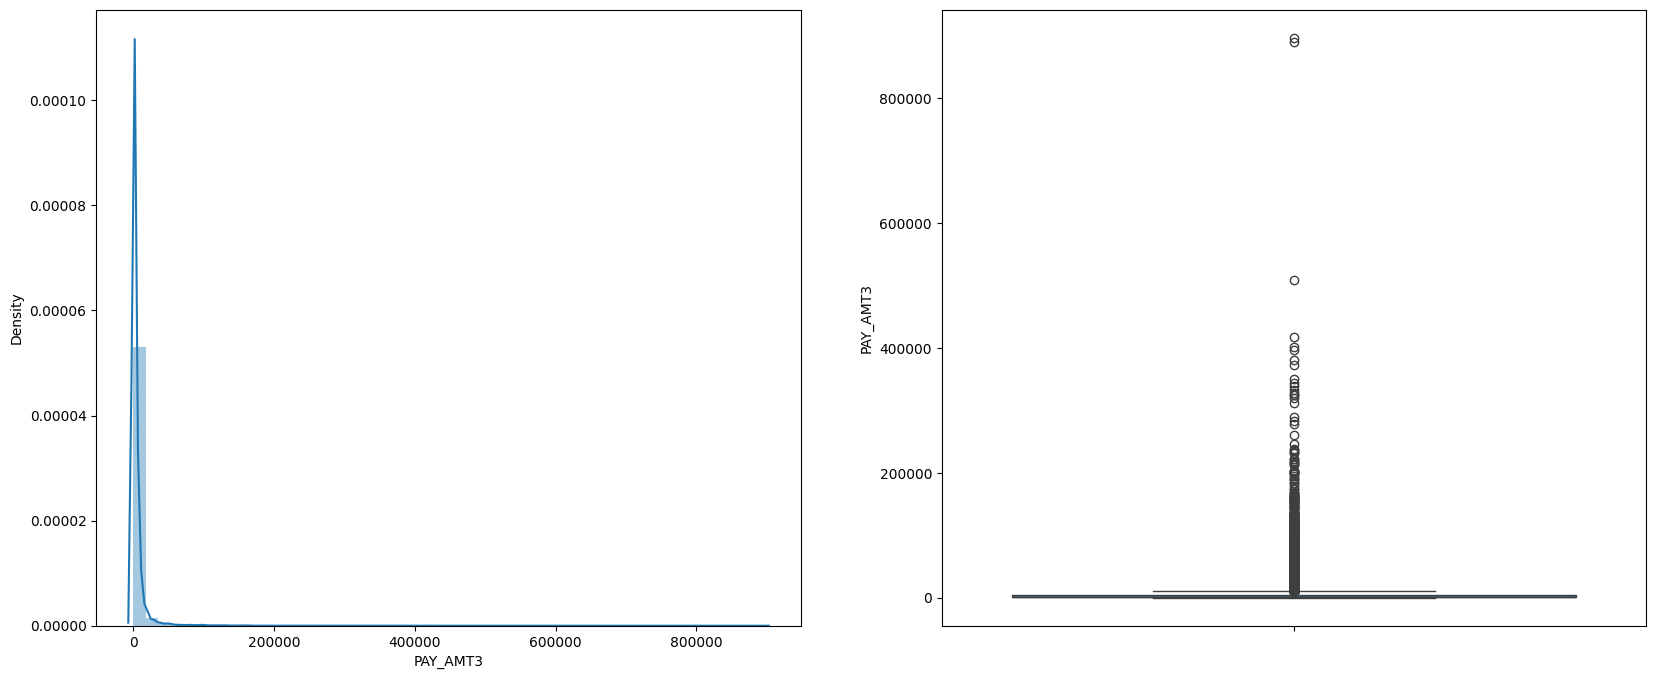

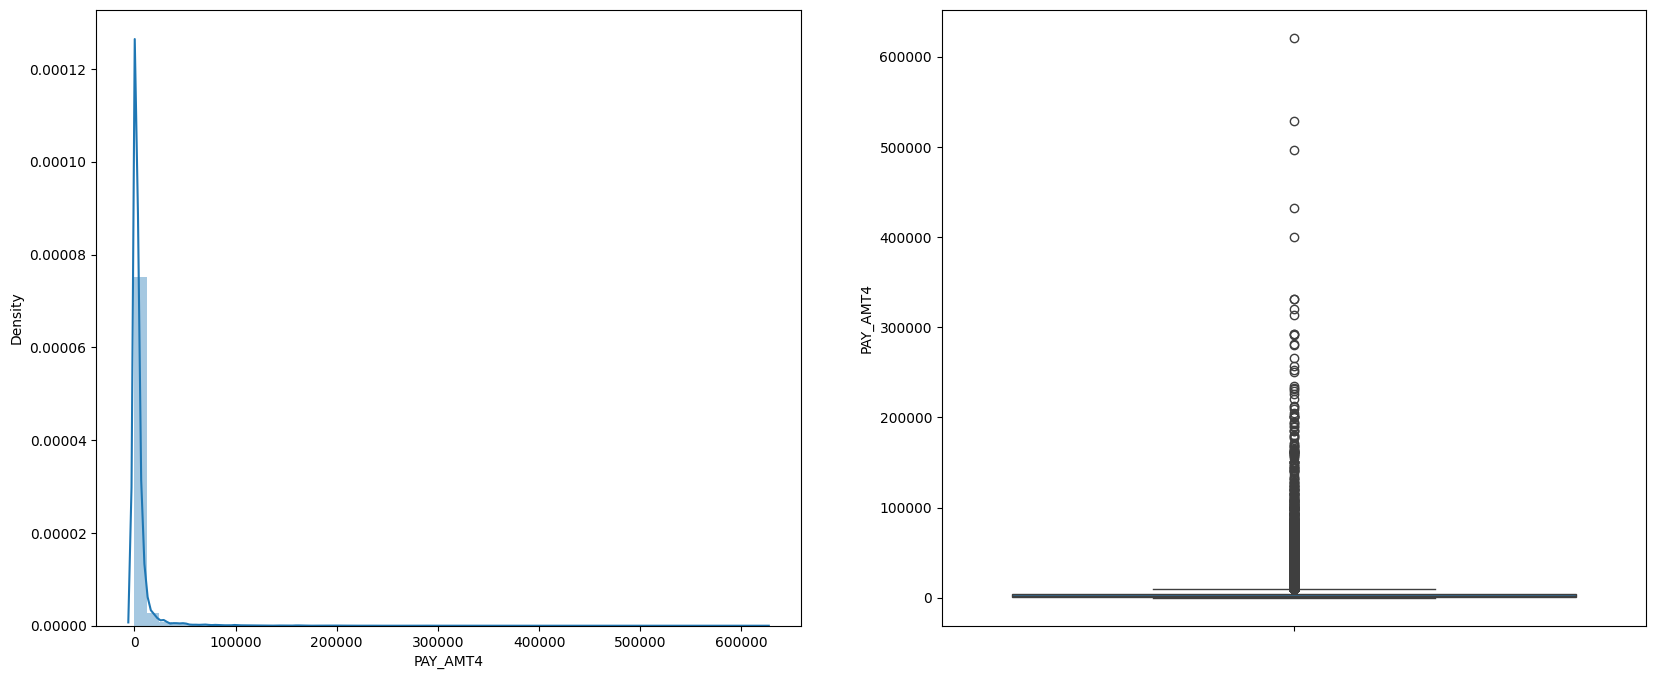

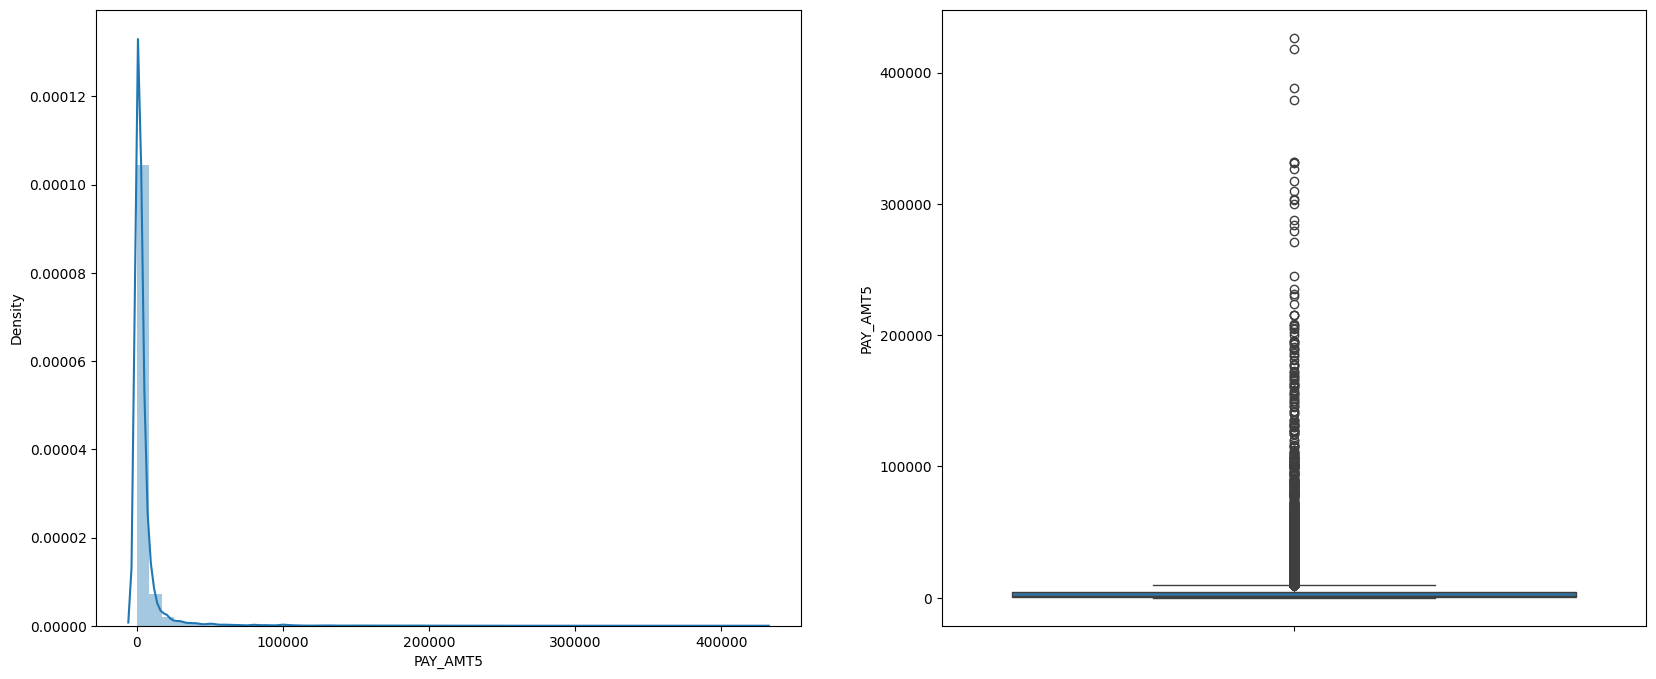

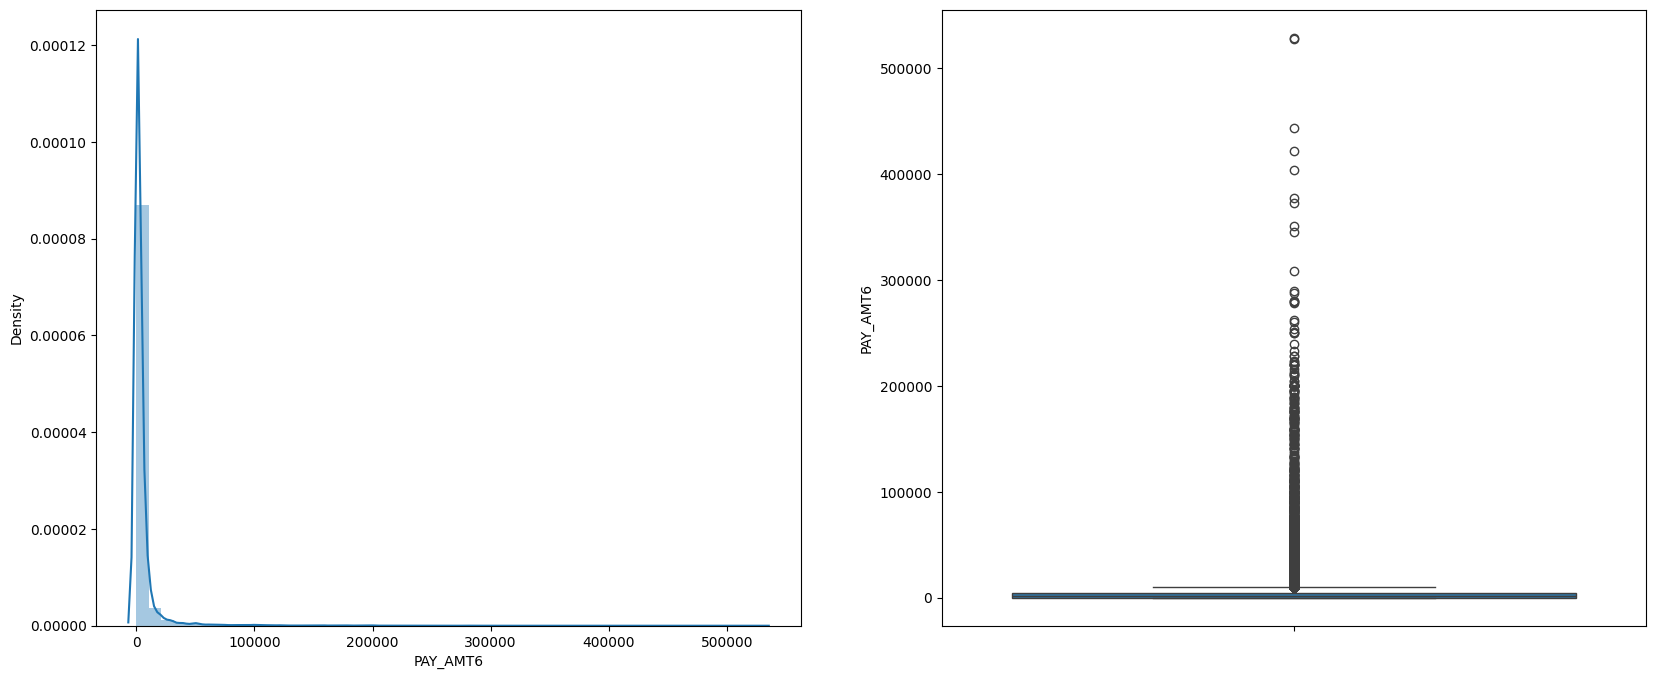

In [29]:
for i in num_cols:
    plt.figure(figsize=[20,8])
    plt.subplot(1,2,1)
    sns.distplot(df[i])
    plt.subplot(1,2,2)
    sns.boxplot(df[i])
    plt.show()

In [30]:
cat_cols=df.select_dtypes(include = object).columns
cat_cols

Index(['SEX', 'EDUCATION', 'PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5',
       'PAY_6', 'default.payment.next.month'],
      dtype='object')

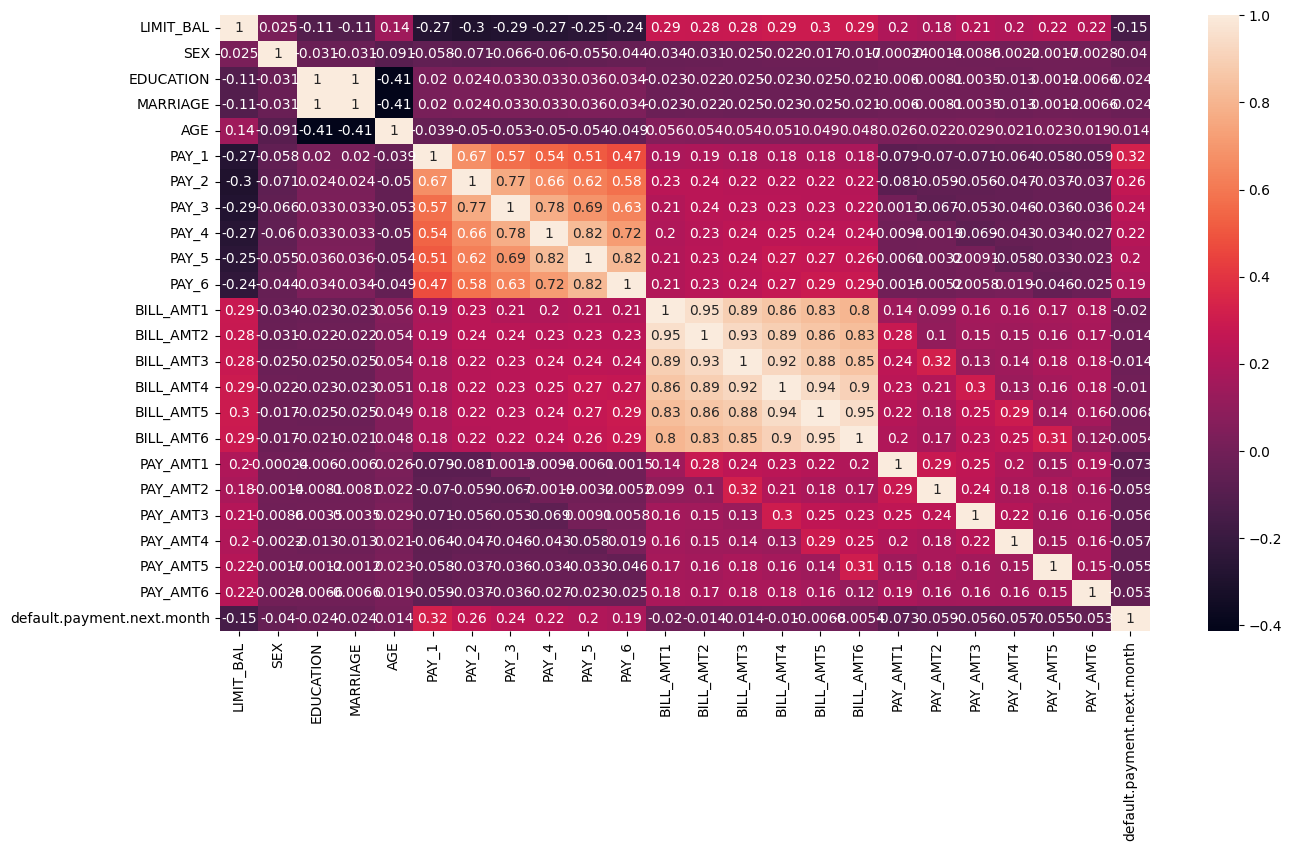

In [31]:
sns.heatmap(df.corr(),annot=True)
plt.show()

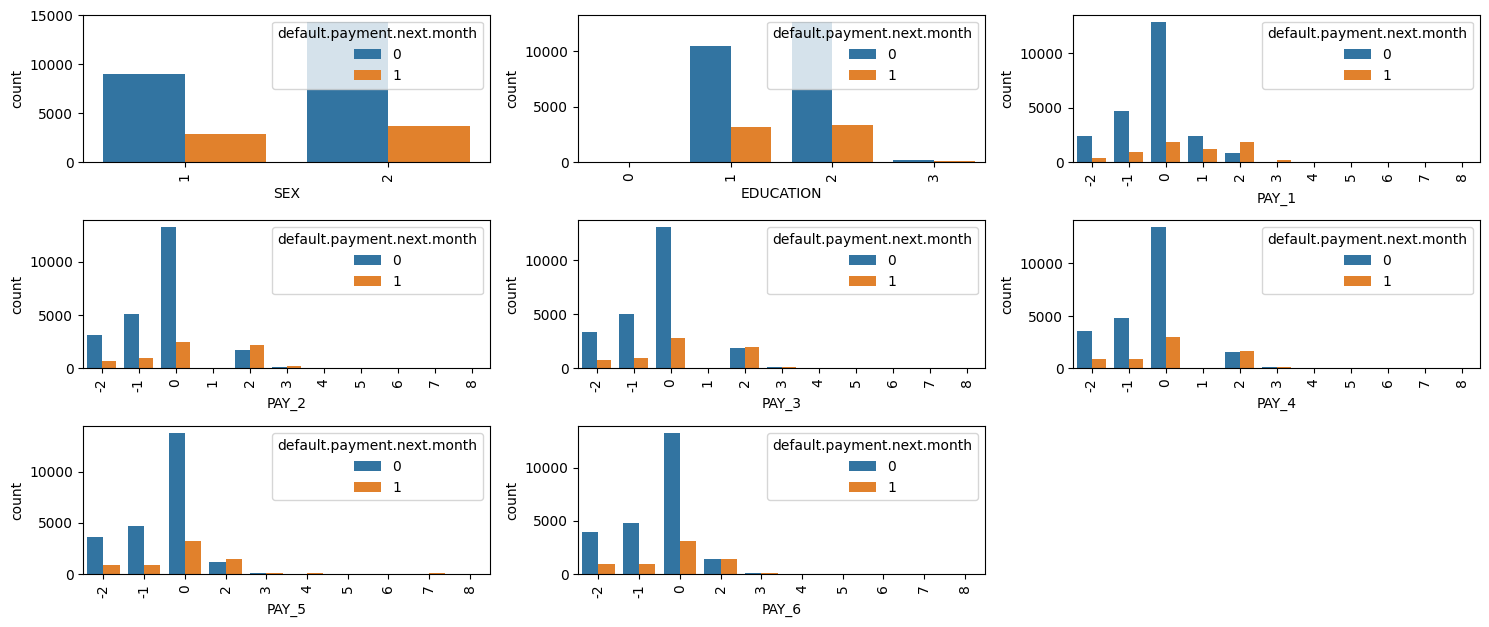

In [32]:
# Convert the target variable to categorical if not already
df['default.payment.next.month'] = df['default.payment.next.month'].astype('category')

# Re-run your plotting code
rows = 4
columns = 3
iterator = 1

for i in cat_cols:
    if i != 'default.payment.next.month':
        plt.subplot(rows, columns, iterator)
        sns.countplot(x=df[i], hue=df['default.payment.next.month'])
        plt.xticks(rotation=90)
        iterator += 1
    else:
        continue

plt.tight_layout()
plt.show()


In [33]:
from scipy import stats

In [34]:
cat_cols=df.drop(['default.payment.next.month'],axis = 1).select_dtypes(object).columns

In [35]:
p_vals = {}
for i in cat_cols:
    table = pd.crosstab(df[i], df['default.payment.next.month'])
    observed_value = table.values
    chi2, p, dof, expected = stats.chi2_contingency(observed_value,correction=False)
    p_vals[i] = p
p_vals

{'SEX': 4.472804335813844e-12,
 'EDUCATION': 8.825862457577375e-08,
 'PAY_1': 0.0,
 'PAY_2': 0.0,
 'PAY_3': 0.0,
 'PAY_4': 0.0,
 'PAY_5': 0.0,
 'PAY_6': 0.0}

In [36]:
stats.chi2_contingency(observed_value,correction =False)

Chi2ContingencyResult(statistic=1886.835309001187, pvalue=0.0, dof=9, expected_freq=array([[3.81222600e+03, 1.08277400e+03],
       [4.47031200e+03, 1.26968800e+03],
       [1.26835368e+04, 3.60246320e+03],
       [2.15416080e+03, 6.11839200e+02],
       [1.43299200e+02, 4.07008000e+01],
       [3.81612000e+01, 1.08388000e+01],
       [1.01244000e+01, 2.87560000e+00],
       [1.47972000e+01, 4.20280000e+00],
       [3.58248000e+01, 1.01752000e+01],
       [1.55760000e+00, 4.42400000e-01]]))

In [37]:
from statsmodels.stats import weightstats as stests

In [38]:
num_cols = df.drop(['default.payment.next.month'],axis=1).select_dtypes(np.number).columns
num_cols

Index(['LIMIT_BAL', 'MARRIAGE', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'],
      dtype='object')

In [39]:
num_cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',]

When numerical columns need to be tested for significance when target is categorical, we will do a two sample mean test (for LIMIT_BAL, AGE, BILL_AMTX and PAY_AMTX columns)

Null Hypothesis (H₀): The mean LIMIT_BAL for those who defaulted is equal to the mean LIMIT_BAL for those who did not default.
Alternative Hypothesis (H₁): The mean LIMIT_BAL for those who defaulted is different from the mean LIMIT_BAL for those who did not default.

If the test returns a p-value less than 0.05, you would reject the null hypothesis, concluding that the credit limit (LIMIT_BAL) is significantly different between the two groups.
Two-Sample Mean Test: Used to determine if there is a significant difference in the means of a numerical variable between two categories of a target variable.
When Used: Appropriate when your predictor variable is numerical, and the target variable is categorical.
Purpose: Helps identify numerical features that significantly differ between categories of the target variable, which can be crucial for understanding and predicting the target variable.

In [40]:
['LIMIT_BAL', 'MARRIAGE', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3',
       'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2',
       'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# The two categories of the target are large samples, hence we can do z test.

['LIMIT_BAL',
 'MARRIAGE',
 'AGE',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6']

The t-test is generally used when the sample size is small (typically less than 30 per group) or when the population standard deviation is unknown. It accounts for the additional uncertainty that comes with estimating the population standard deviation from a small sample.
The t-test is generally used when the sample size is small (typically less than 30 per group) or when the population standard deviation is unknown. It accounts for the additional uncertainty that comes with estimating the population standard deviation from a small sample.

In [41]:
p_val = {}
for i in num_cols:
    x1 = df[(df['default.payment.next.month'] == 0)][i]
    x2 = df[(df['default.payment.next.month'] == 1)][i]
    z_score, pval = stests.ztest(x1 = x1, x2 = x2 , value = 0, alternative = 'two-sided')
    p_val[i] = pval
p_val

{'LIMIT_BAL': 1.7456891860689276e-159,
 'AGE': 0.01613083540718879,
 'BILL_AMT1': 0.000666458894348233,
 'BILL_AMT2': 0.013951754044408744,
 'BILL_AMT3': 0.01476421905131808,
 'BILL_AMT4': 0.07854544833719244,
 'BILL_AMT5': 0.24162514177412497,
 'BILL_AMT6': 0.3521150333737273,
 'PAY_AMT1': 9.234672141977336e-37,
 'PAY_AMT2': 2.8928830381533725e-24,
 'PAY_AMT3': 1.705316820236147e-22,
 'PAY_AMT4': 6.304758938546825e-23,
 'PAY_AMT5': 1.1562201413814994e-21,
 'PAY_AMT6': 2.8522640944438073e-20}

The p_values for BILL_AMT4, BILL_AMT5 and BILL_AMT6 are greater than 0.05. Hence, we fail to reject the null hypothesis. Hence, these columns are statistically insignificant.

Encoding

We will try two encoding methods - we will do dummy encoding and label encoding for the categorical columns.

In [42]:
df1 = df.copy()

In [43]:
df1.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,1,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,1,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,1,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [44]:
df1 = pd.get_dummies(df1, columns = ['SEX','EDUCATION','MARRIAGE','PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6','default.payment.next.month'],drop_first = True)
df1.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default.payment.next.month_1
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,False,False,False,False,False,False,False,False,False,True
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,False,False,True,False,False,False,False,False,False,True
2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,False,True,False,False,False,False,False,False,False,False
3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,False,True,False,False,False,False,False,False,False,False
4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,...,False,True,False,False,False,False,False,False,False,False


Label Encoding

For SEX, MARRIAGE and target column, we can just change the datatype to numerical as they are already labelled appropriately. For other columns, we will carry out label encoding by using 'replace'.

In [45]:
df['SEX'] = df['SEX'].astype(int)

In [46]:
df['MARRIAGE'] = df['MARRIAGE'].astype(int)

In [47]:
df['default.payment.next.month'] = df['default.payment.next.month'].astype(int)

In [48]:
df['EDUCATION'].unique()

array([1, 2, 3, 0], dtype=object)

In [49]:
def encode_edu(x):
    if x in (0,5,6):
        return 0
    else:
        return int(x)

In [50]:
df['EDUCATION'] = df['EDUCATION'].apply(encode_edu)
df['EDUCATION'].unique()

array([1, 2, 3, 0], dtype=int64)

In [51]:
df['PAY_1'].unique()

array([2, -1, 0, -2, 1, 3, 4, 8, 7, 5, 6], dtype=object)

In [52]:
def encode_pay(x):
    if x == -2:
        return 0
    if x == -1:
        return -2
    if x == 0:
        return -1
    else:
        return x
# For PAY columns, we are changing -2 to 0, so as to mark inactive customers as 0 
# Then we will change -1 to -2 which is Paid duly and 0 to -1 which is revolving credit.
# 1-8 will remain as is to indicate delay of payment by the number of months same as the number. 

In [53]:
pay_list = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

In [54]:
for i in pay_list:
    df[i] = df[i].apply(encode_pay)

In [55]:
df_orig_label = df

In [56]:
df_orig_label.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,1,1,24,2,2,-2,-2,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-2,2,-1,-1,-1,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,-1,-1,-1,-1,-1,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,1,1,37,-1,-1,-1,-1,-1,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,1,1,57,-2,-1,-2,-1,-1,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [57]:
df1.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8,default.payment.next.month_1
0,20000.0,24,3913.0,3102.0,689.0,0.0,0.0,0.0,0.0,689.0,...,False,False,False,False,False,False,False,False,False,True
1,120000.0,26,2682.0,1725.0,2682.0,3272.0,3455.0,3261.0,0.0,1000.0,...,False,False,True,False,False,False,False,False,False,True
2,90000.0,34,29239.0,14027.0,13559.0,14331.0,14948.0,15549.0,1518.0,1500.0,...,False,True,False,False,False,False,False,False,False,False
3,50000.0,37,46990.0,48233.0,49291.0,28314.0,28959.0,29547.0,2000.0,2019.0,...,False,True,False,False,False,False,False,False,False,False
4,50000.0,57,8617.0,5670.0,35835.0,20940.0,19146.0,19131.0,2000.0,36681.0,...,False,True,False,False,False,False,False,False,False,False


In [58]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 80 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   LIMIT_BAL                     30000 non-null  float64
 1   AGE                           30000 non-null  int64  
 2   BILL_AMT1                     30000 non-null  float64
 3   BILL_AMT2                     30000 non-null  float64
 4   BILL_AMT3                     30000 non-null  float64
 5   BILL_AMT4                     30000 non-null  float64
 6   BILL_AMT5                     30000 non-null  float64
 7   BILL_AMT6                     30000 non-null  float64
 8   PAY_AMT1                      30000 non-null  float64
 9   PAY_AMT2                      30000 non-null  float64
 10  PAY_AMT3                      30000 non-null  float64
 11  PAY_AMT4                      30000 non-null  float64
 12  PAY_AMT5                      30000 non-null  float64
 13  P

In [59]:
df_orig_dummy = df1

TEST AND TRAIN

In [60]:
X_orig_dummy = df_orig_dummy.drop(['default.payment.next.month_1'],axis=1)
y_orig_dummy = df_orig_dummy['default.payment.next.month_1']

Xtrain_orig_dummy, Xtest_orig_dummy, ytrain_orig_dummy, ytest_orig_dummy = train_test_split(X_orig_dummy,y_orig_dummy,test_size=0.30,random_state=42)
print(Xtrain_orig_dummy.shape)
print(Xtest_orig_dummy.shape)
print(ytrain_orig_dummy.shape)
print(ytest_orig_dummy.shape)

(21000, 79)
(9000, 79)
(21000,)
(9000,)


In [61]:
X_orig_label = df_orig_label.drop(['default.payment.next.month'],axis=1)
y_orig_label = df_orig_label['default.payment.next.month']

Xtrain_orig_label, Xtest_orig_label, ytrain_orig_label, ytest_orig_label = train_test_split(X_orig_label,y_orig_label,test_size=0.30,random_state=42)
print(Xtrain_orig_label.shape)
print(Xtest_orig_label.shape)
print(ytrain_orig_label.shape)
print(ytest_orig_label.shape)

(21000, 23)
(9000, 23)
(21000,)
(9000,)


In [62]:
Xtrain_orig_dummy.columns

Index(['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4',
       'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3',
       'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'SEX_2', 'EDUCATION_1',
       'EDUCATION_2', 'EDUCATION_3', 'MARRIAGE_1', 'MARRIAGE_2', 'MARRIAGE_3',
       'PAY_1_-1', 'PAY_1_0', 'PAY_1_1', 'PAY_1_2', 'PAY_1_3', 'PAY_1_4',
       'PAY_1_5', 'PAY_1_6', 'PAY_1_7', 'PAY_1_8', 'PAY_2_-1', 'PAY_2_0',
       'PAY_2_1', 'PAY_2_2', 'PAY_2_3', 'PAY_2_4', 'PAY_2_5', 'PAY_2_6',
       'PAY_2_7', 'PAY_2_8', 'PAY_3_-1', 'PAY_3_0', 'PAY_3_1', 'PAY_3_2',
       'PAY_3_3', 'PAY_3_4', 'PAY_3_5', 'PAY_3_6', 'PAY_3_7', 'PAY_3_8',
       'PAY_4_-1', 'PAY_4_0', 'PAY_4_1', 'PAY_4_2', 'PAY_4_3', 'PAY_4_4',
       'PAY_4_5', 'PAY_4_6', 'PAY_4_7', 'PAY_4_8', 'PAY_5_-1', 'PAY_5_0',
       'PAY_5_2', 'PAY_5_3', 'PAY_5_4', 'PAY_5_5', 'PAY_5_6', 'PAY_5_7',
       'PAY_5_8', 'PAY_6_-1', 'PAY_6_0', 'PAY_6_2', 'PAY_6_3', 'PAY_6_4',
       'PAY_6_5', 'PAY_6_6', 'PAY_6_7', 'PA

In [63]:
sc=StandardScaler()
cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for i in cols:
    Xtrain_orig_dummy[i]=sc.fit_transform(Xtrain_orig_dummy[[i]])
    Xtest_orig_dummy[i]=sc.transform(Xtest_orig_dummy[[i]])

In [64]:
Xtrain_orig_dummy.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
28465,0.563914,0.487684,-0.694979,-0.690691,-0.676308,-0.674219,-0.665072,-0.657278,-0.334158,-0.237820,...,False,False,False,False,False,False,False,False,False,False
27622,-0.906109,-1.354775,-0.648178,-0.655728,-0.643113,-0.599093,-0.502942,-0.646122,-0.183068,-0.145394,...,False,True,False,False,False,False,False,False,False,False
28376,-0.906109,0.054164,-0.064556,-0.053538,0.032999,0.076353,0.055141,-0.063506,-0.334158,-0.050658,...,False,False,True,False,False,False,False,False,False,False
10917,0.254436,2.005003,0.808454,0.828364,0.835234,0.930802,1.010764,-0.657278,-0.334158,-0.237820,...,False,False,False,True,False,False,False,False,False,False
27234,0.563914,-0.054216,-0.667362,-0.662374,-0.361686,-0.406551,-0.444155,-0.274249,-0.214555,0.630972,...,False,True,False,False,False,False,False,False,False,False


In [65]:
Xtest_orig_dummy.head()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,...,PAY_5_8,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
2308,-1.060849,-1.138015,-0.574033,-0.548725,-0.509092,-0.477326,-0.438388,-0.406625,-0.245212,-0.158177,...,False,False,True,False,False,False,False,False,False,False
22404,-0.132413,-1.029635,1.170733,1.082130,1.008471,0.915652,0.619752,0.648798,-0.068150,-0.069175,...,False,False,True,False,False,False,False,False,False,False
23397,-0.751370,-0.379356,0.261810,0.283965,0.313184,0.417503,0.493651,0.529590,-0.190006,-0.113895,...,False,False,True,False,False,False,False,False,False,False
25058,-0.287152,1.463104,-0.412835,-0.423239,-0.442803,-0.409744,-0.479374,-0.539896,-0.238690,-0.165823,...,False,True,False,False,False,False,False,False,False,False
2664,-0.906109,0.054164,0.590727,-0.018604,-0.064665,-0.367861,-0.329657,-0.328680,-0.215563,-0.178088,...,False,False,False,True,False,False,False,False,False,False


In [66]:
sc=StandardScaler()
cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for i in cols:
    Xtrain_orig_label[i]=sc.fit_transform(Xtrain_orig_label[[i]])
    Xtest_orig_label[i]=sc.transform(Xtest_orig_label[[i]])

In [67]:
Xtrain_orig_label.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
28465,0.563914,2,1,1,0.487684,0,0,0,0,0,...,-0.676308,-0.674219,-0.665072,-0.657278,-0.334158,-0.237820,-0.286287,-0.303704,-0.306697,-0.295508
27622,-0.906109,2,2,2,-1.354775,-2,-2,-2,-2,-2,...,-0.643113,-0.599093,-0.502942,-0.646122,-0.183068,-0.145394,-0.022842,0.305068,-0.265029,-0.127272
28376,-0.906109,2,1,1,0.054164,2,2,2,2,-1,...,0.032999,0.076353,0.055141,-0.063506,-0.334158,-0.050658,-0.286287,-0.179343,-0.085730,-0.295508
10917,0.254436,2,1,1,2.005003,6,5,4,3,2,...,0.835234,0.930802,1.010764,-0.657278,-0.334158,-0.237820,-0.286287,-0.303704,-0.306697,-0.295508
27234,0.563914,1,1,1,-0.054216,-2,-2,-2,-1,-2,...,-0.361686,-0.406551,-0.444155,-0.274249,-0.214555,0.630972,-0.224816,0.529960,1.130978,0.992796


In [68]:
Xtest_orig_label.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
2308,-1.060849,1,2,2,-1.138015,-1,-1,-1,-1,-1,...,-0.509092,-0.477326,-0.438388,-0.406625,-0.245212,-0.158177,-0.203960,-0.210619,-0.211997,-0.182597
22404,-0.132413,2,2,2,-1.029635,-1,-1,-1,-1,-1,...,1.008471,0.915652,0.619752,0.648798,-0.068150,-0.069175,-0.112797,-0.139441,-0.138194,-0.144829
23397,-0.751370,2,1,1,-0.379356,-1,-1,-1,-1,-1,...,0.313184,0.417503,0.493651,0.529590,-0.190006,-0.113895,-0.121634,-0.152411,-0.148863,-0.151321
25058,-0.287152,1,2,2,1.463104,-1,-1,-1,-1,-1,...,-0.442803,-0.409744,-0.479374,-0.539896,-0.238690,-0.165823,0.098672,-0.302028,0.135931,-0.046654
2664,-0.906109,2,2,2,0.054164,-1,-1,-1,-1,-1,...,-0.064665,-0.367861,-0.329657,-0.328680,-0.215563,-0.178088,-0.231402,-0.192003,-0.306697,-0.239053


We will use decision tree for our base model

In [69]:
decision_tree = DecisionTreeClassifier(random_state = 42)

decision_tree = decision_tree.fit(Xtrain_orig_dummy, ytrain_orig_dummy)

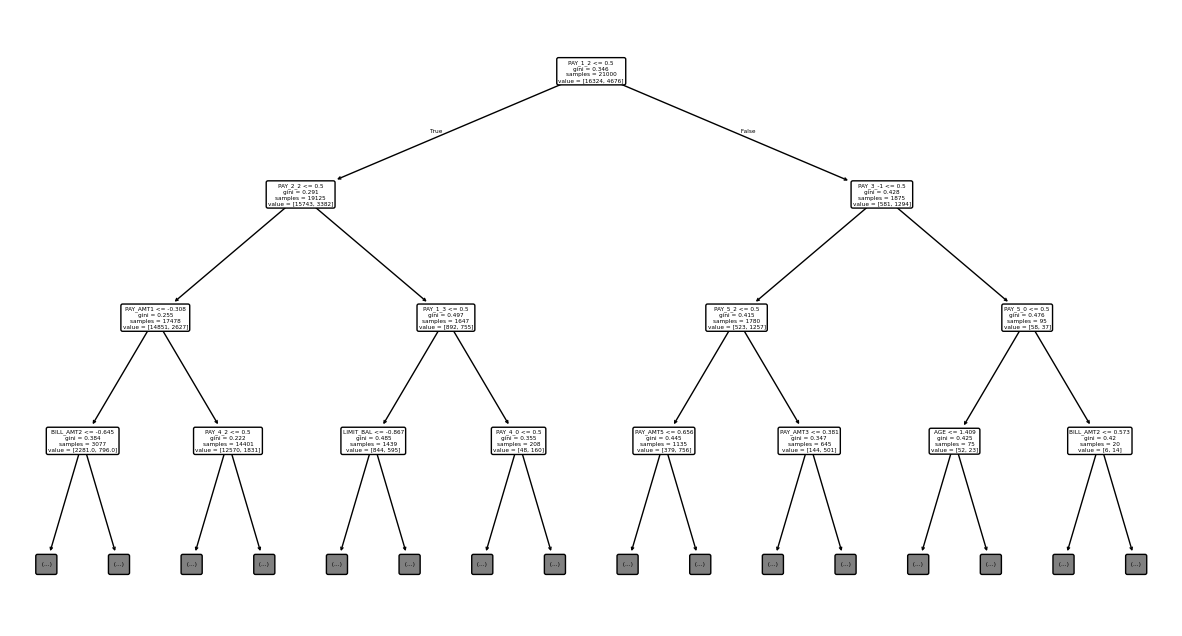

In [70]:
tree.plot_tree(decision_tree, max_depth=3, feature_names = Xtrain_orig_dummy.columns, rounded=True)
plt.show()

In [71]:
ypred_orig_dummy = decision_tree.predict(Xtest_orig_dummy)
print(classification_report(ytest_orig_dummy, ypred_orig_dummy))

              precision    recall  f1-score   support

       False       0.84      0.82      0.83      7040
        True       0.39      0.43      0.41      1960

    accuracy                           0.73      9000
   macro avg       0.61      0.62      0.62      9000
weighted avg       0.74      0.73      0.74      9000



精确率（Precision）： 模型预测为正类的样本中，真正为正类的比例。高精确率表示模型的误报率较低。

False (0)： 0.84 的精确率意味着模型预测为 'False' 的样本中，有 84% 是真正的 'False'。 True (1)： 0.39 的精确率意味着模型预测为 'True' 的样本中，有 39% 是真正的 'True'。 召回率（Recall）： 实际为正类的样本中，被正确预测为正类的比例。高召回率表示模型捕捉到了大部分正类样本。

False (0)： 0.82 的召回率意味着模型正确识别了 82% 的实际 'False' 样本。 True (1)： 0.43 的召回率意味着模型正确识别了 43% 的实际 'True' 样本。 F1-分数（F1-Score）： 精确率和召回率的调和平均值。F1-分数在精确率和召回率之间取得平衡，尤其在类别分布不均衡时很有用。

False (0)： 0.83 的 F1-分数。 True (1)： 0.41 的 F1-分数。 支持度（Support）： 测试数据集中每个类别的实际样本数。

False (0)： 7040 个样本。 True (1)： 1960 个样本。 2. 模型整体表现： 准确率（Accuracy）： 0.73 的准确率意味着模型有 73% 的预测是正确的。

宏平均（Macro Avg）： 每个类别的精确率、召回率和 F1-分数的非加权平均值。它平等地对待所有类别，而不考虑它们的支持度。

精确率： 0.61 召回率： 0.62 F1-分数： 0.62 加权平均（Weighted Avg）： 根据每个类别的支持度计算的精确率、召回率和 F1-分数的加权平均值。在类别分布不均衡时非常有用。

精确率： 0.74 召回率： 0.73 F1-分数： 0.74 3. 分析与见解： 表现不平衡： 模型在大多数类（'False' 或 0）上的表现很好，但在少数类（'True' 或 1）上的表现较差。对于 'True' 类，较低的精确率、召回率和 F1-分数表明模型在识别 'True' 样本时效果不佳。

数据集不平衡： 'False' 和 'True' 类别之间的支持度差异较大，表明数据集存在不平衡问题。这种不平衡可能导致模型在预测少数类（'True'）时遇到困难。

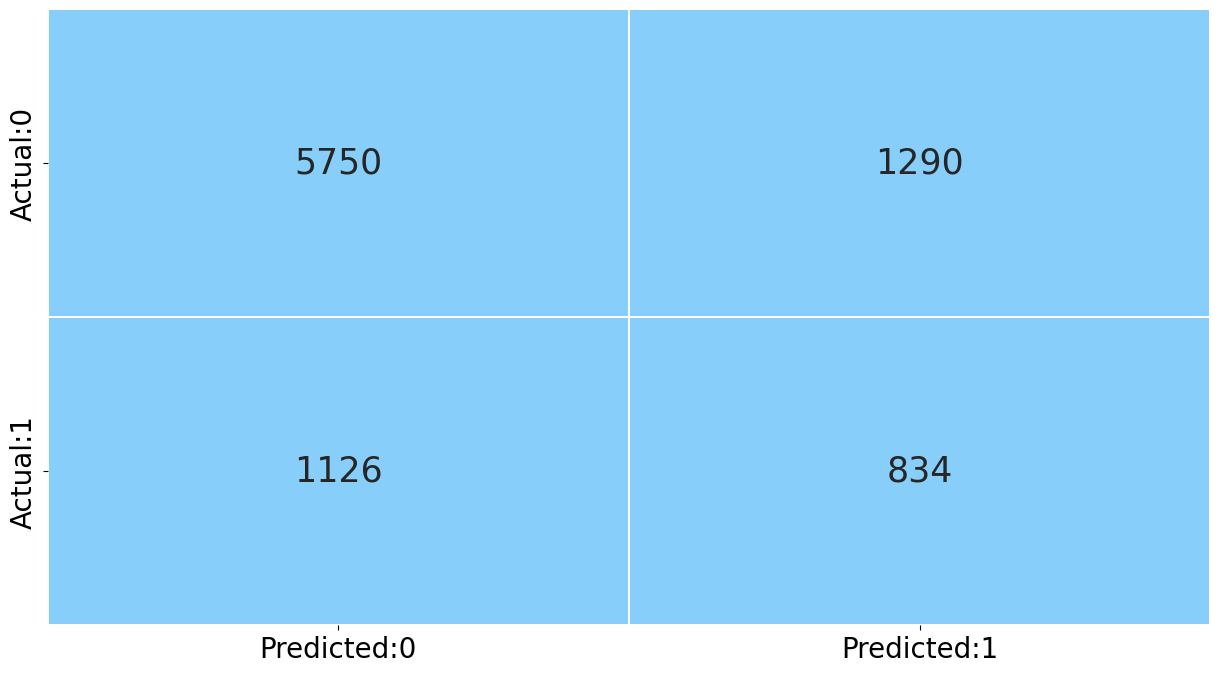

In [72]:
from matplotlib.colors import ListedColormap
cm = confusion_matrix(ytest_orig_dummy, ypred_orig_dummy)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

精确率（Precision）： 模型预测为正类的样本中，真正为正类的比例。高精确率表示模型的误报率较低。

False (0)： 0.84 的精确率意味着模型预测为 'False' 的样本中，有 84% 是真正的 'False'。
True (1)： 0.39 的精确率意味着模型预测为 'True' 的样本中，有 39% 是真正的 'True'。
召回率（Recall）： 实际为正类的样本中，被正确预测为正类的比例。高召回率表示模型捕捉到了大部分正类样本。

False (0)： 0.82 的召回率意味着模型正确识别了 82% 的实际 'False' 样本。
True (1)： 0.43 的召回率意味着模型正确识别了 43% 的实际 'True' 样本。
F1-分数（F1-Score）： 精确率和召回率的调和平均值。F1-分数在精确率和召回率之间取得平衡，尤其在类别分布不均衡时很有用。

False (0)： 0.83 的 F1-分数。
True (1)： 0.41 的 F1-分数。
支持度（Support）： 测试数据集中每个类别的实际样本数。

False (0)： 7040 个样本。
True (1)： 1960 个样本。
2. 模型整体表现：
准确率（Accuracy）： 0.73 的准确率意味着模型有 73% 的预测是正确的。

宏平均（Macro Avg）： 每个类别的精确率、召回率和 F1-分数的非加权平均值。它平等地对待所有类别，而不考虑它们的支持度。

精确率： 0.61
召回率： 0.62
F1-分数： 0.62
加权平均（Weighted Avg）： 根据每个类别的支持度计算的精确率、召回率和 F1-分数的加权平均值。在类别分布不均衡时非常有用。

精确率： 0.74
召回率： 0.73
F1-分数： 0.74
3. 分析与见解：
表现不平衡： 模型在大多数类（'False' 或 0）上的表现很好，但在少数类（'True' 或 1）上的表现较差。对于 'True' 类，较低的精确率、召回率和 F1-分数表明模型在识别 'True' 样本时效果不佳。

数据集不平衡： 'False' 和 'True' 类别之间的支持度差异较大，表明数据集存在不平衡问题。这种不平衡可能导致模型在预测少数类（'True'）时遇到困难。

In [73]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# 初始化随机森林分类器
random_forest = RandomForestClassifier(random_state=42, n_estimators=100)

# 用训练数据训练模型
random_forest.fit(Xtrain_orig_dummy, ytrain_orig_dummy)

# 预测测试数据集
ypred_orig_dummy_rf = random_forest.predict(Xtest_orig_dummy)

# 输出分类报告
print(classification_report(ytest_orig_dummy, ypred_orig_dummy_rf))


              precision    recall  f1-score   support

       False       0.84      0.94      0.89      7040
        True       0.63      0.36      0.46      1960

    accuracy                           0.81      9000
   macro avg       0.73      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000



In [80]:
from sklearn.model_selection import GridSearchCV

# 定义超参数范围
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# 初始化随机森林模型
random_forest = RandomForestClassifier(random_state=42)

# 使用网格搜索调整超参数
grid_search = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(Xtrain_orig_dummy, ytrain_orig_dummy)

# 输出最优参数
print("Best Parameters:", grid_search.best_params_)

# 用最优参数重新训练模型
best_random_forest = grid_search.best_estimator_
best_random_forest.fit(Xtrain_orig_dummy, ytrain_orig_dummy)

# 预测并评估模型
ypred_orig_dummy_rf = best_random_forest.predict(Xtest_orig_dummy)
print(classification_report(ytest_orig_dummy, ypred_orig_dummy_rf))


Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

       False       0.84      0.95      0.89      7040
        True       0.66      0.34      0.45      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.65      0.67      9000
weighted avg       0.80      0.82      0.79      9000



In [74]:
# Importing libraries:-

from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [76]:
df_orig_label

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,20000.0,2,1,1,24,2,2,-2,-2,0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,120000.0,2,2,2,26,-2,2,-1,-1,-1,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,90000.0,2,2,2,34,-1,-1,-1,-1,-1,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,50000.0,2,1,1,37,-1,-1,-1,-1,-1,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,50000.0,1,1,1,57,-2,-1,-2,-1,-1,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000.0,1,1,1,39,-1,-1,-1,-1,-1,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,150000.0,1,2,2,43,-2,-2,-2,-2,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,30000.0,1,2,2,37,4,3,2,-2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,80000.0,1,1,1,41,1,-2,-1,-1,-1,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


In [78]:
X_fe=df_orig_label.drop('default.payment.next.month',axis=1)
y_fe=df_orig_label['default.payment.next.month']

# Splitting of data:-

X_train_fe,X_test_fe,y_train_fe,y_test_fe=train_test_split(X_fe,y_fe,test_size=0.30,random_state=42)
print(X_train_fe.shape)
print(X_test_fe.shape)
print(y_train_fe.shape)
print(y_test_fe.shape)

### Scaling Dataframe

sc=StandardScaler()
cols = ['LIMIT_BAL', 'AGE', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']
for i in cols:
    X_train_fe[i]=sc.fit_transform(X_train_fe[[i]])
    X_test_fe[i]=sc.transform(X_test_fe[[i]])

(21000, 23)
(9000, 23)
(21000,)
(9000,)


In [79]:
ada_model = AdaBoostClassifier(n_estimators = 100, random_state = 42)

ada_model.fit(X_train_fe, y_train_fe)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [81]:
ypred_fe = ada_model.predict(X_test_fe)
print(classification_report(y_test_fe, ypred_fe))

              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7040
           1       0.66      0.32      0.43      1960

    accuracy                           0.82      9000
   macro avg       0.75      0.64      0.66      9000
weighted avg       0.80      0.82      0.79      9000



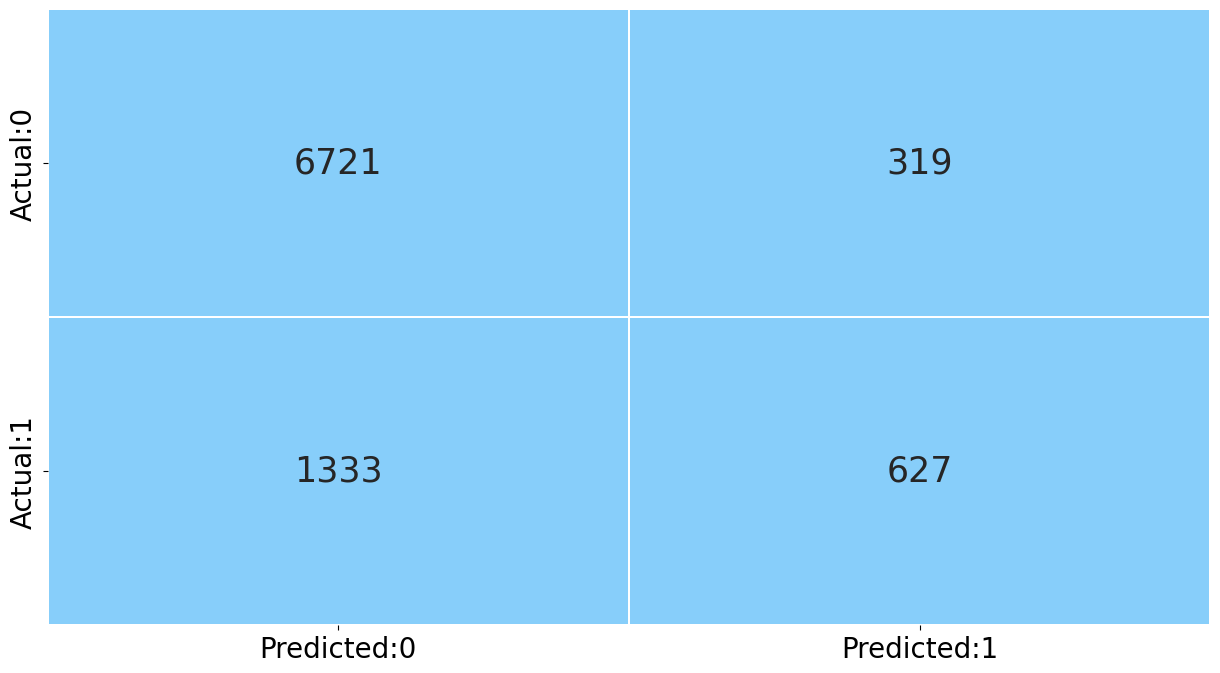

In [82]:
cm = confusion_matrix(y_test_fe, ypred_fe)
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot = True, fmt = 'd', cmap = ListedColormap(['lightskyblue']), cbar = False, 
            linewidths = 0.1, annot_kws = {'size':25})
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.show()

In [83]:
tuned_paramaters = [{'n_estimators': [100, 120, 150, 200, 250, 300, 350],
                     'learning_rate': [0.01,0.02,0.03,0.04,0.05,0.06,0.001,0.002,0.003,0.004,0.005,0.006]}]
ada_model = AdaBoostClassifier(random_state = 42)
ada_grid = GridSearchCV(estimator = ada_model, 
                         param_grid = tuned_paramaters, 
                         cv = 3,
                         n_jobs=-1)
ada_grid.fit(X_train_fe, y_train_fe)
print('Best parameters for AdaBoost Classifier: ', ada_grid.best_params_, '\n')

Best parameters for AdaBoost Classifier:  {'learning_rate': 0.01, 'n_estimators': 100} 



In [84]:
from sklearn.model_selection import cross_val_score

In [85]:
ada_model = AdaBoostClassifier(learning_rate = ada_grid.best_params_['learning_rate'], 
                               n_estimators = ada_grid.best_params_['n_estimators'], 
                               random_state = 42)

In [86]:
tuned_ada = ada_model.fit(X_train_fe, y_train_fe)

In [87]:
ypred_tuned = tuned_ada.predict(X_test_fe)
print(classification_report(y_test_fe, ypred_tuned))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7040
           1       0.69      0.32      0.44      1960

    accuracy                           0.82      9000
   macro avg       0.76      0.64      0.66      9000
weighted avg       0.80      0.82      0.79      9000

